In [1]:
# !pip install gpxpy

In [2]:
# !pip install pyvista[all]

In [3]:
# !pip install mayavi

In [90]:
import pandas as pd
import os
import gpxpy
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

Total Distance: 100.81 miles
Elevation Gain: 20386 ft
Elevation Loss: 25325 ft
Max Elevation: 8696 ft
Min Elevation: 533 ft
Average Grade: 3.83%


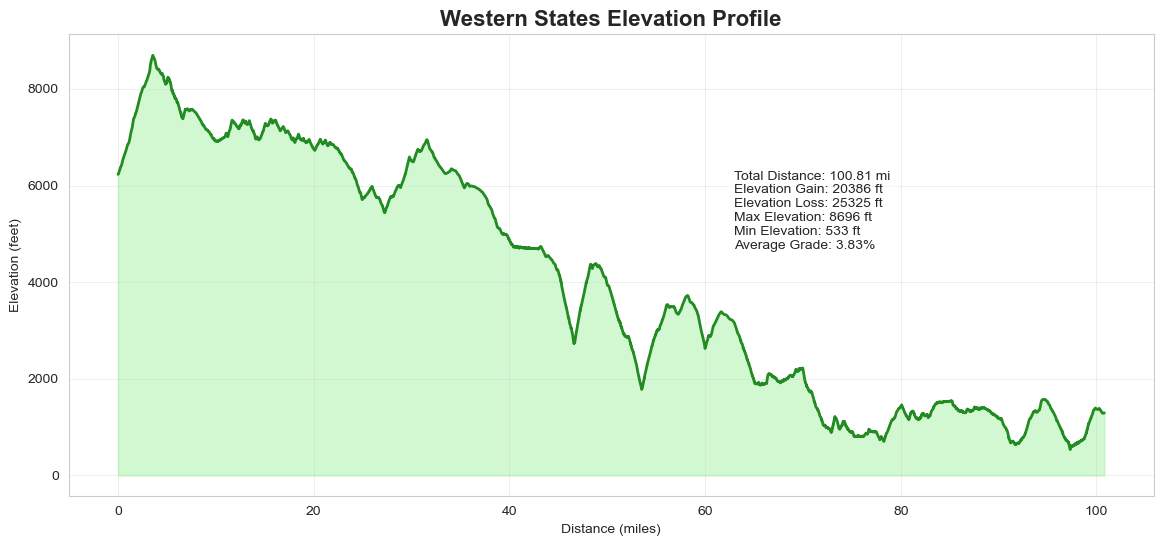

In [5]:
import gpxpy
import matplotlib.pyplot as plt

# === Load GPX File ===
gpx_path = r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx'
with open(gpx_path, 'r') as f:
    gpx = gpxpy.parse(f)

# Initialize Variables
total_distance_m = 0
elevation_gain_m = 0
elevation_loss_m = 0
elevations_m = []
distances_m = []

# Process Track Points
for track in gpx.tracks:
    for segment in track.segments:
        prev_point = None
        for point in segment.points:
            if prev_point:
                dist = point.distance_3d(prev_point)
                total_distance_m += dist
                distances_m.append(total_distance_m)
                delta_elev = point.elevation - prev_point.elevation
                if delta_elev > 0:
                    elevation_gain_m += delta_elev
                else:
                    elevation_loss_m -= delta_elev
            else:
                distances_m.append(0)
            elevations_m.append(point.elevation)
            prev_point = point

# Convert to Imperial Units
meters_to_miles = 0.000621371
meters_to_feet = 3.28084

total_distance_mi = total_distance_m * meters_to_miles
elevation_gain_ft = elevation_gain_m * meters_to_feet
elevation_loss_ft = elevation_loss_m * meters_to_feet
elevations_ft = [e * meters_to_feet for e in elevations_m]
distances_mi = [d * meters_to_miles for d in distances_m]

max_elev_ft = max(elevations_ft)
min_elev_ft = min(elevations_ft)
avg_grade = (elevation_gain_ft / (total_distance_mi * 5280)) * 100 if total_distance_mi > 0 else 0

# Print Stats
print(f"Total Distance: {total_distance_mi:.2f} miles")
print(f"Elevation Gain: {elevation_gain_ft:.0f} ft")
print(f"Elevation Loss: {elevation_loss_ft:.0f} ft")
print(f"Max Elevation: {max_elev_ft:.0f} ft")
print(f"Min Elevation: {min_elev_ft:.0f} ft")
print(f"Average Grade: {avg_grade:.2f}%")



import pyvista as pv
import numpy as np


import plotly.graph_objects as go


plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")
plt.plot(distances_mi, elevations_ft, color='forestgreen', linewidth=2)
plt.fill_between(distances_mi, elevations_ft, color='lightgreen', alpha=0.4)
plt.title("Western States Elevation Profile", fontsize=16, fontweight='bold')
plt.xlabel("Distance (miles)")
plt.ylabel("Elevation (feet)")
plt.grid(alpha=0.3)


metrics_text = f"""
Total Distance: {total_distance_mi:.2f} mi
Elevation Gain: {elevation_gain_ft:.0f} ft
Elevation Loss: {elevation_loss_ft:.0f} ft
Max Elevation: {max_elev_ft:.0f} ft
Min Elevation: {min_elev_ft:.0f} ft
Average Grade: {avg_grade:.2f}%
"""
plt.figtext(0.6, 0.5, metrics_text, fontsize=10, bbox={"facecolor":"white","alpha":0.6,"pad":5})

plt.show()



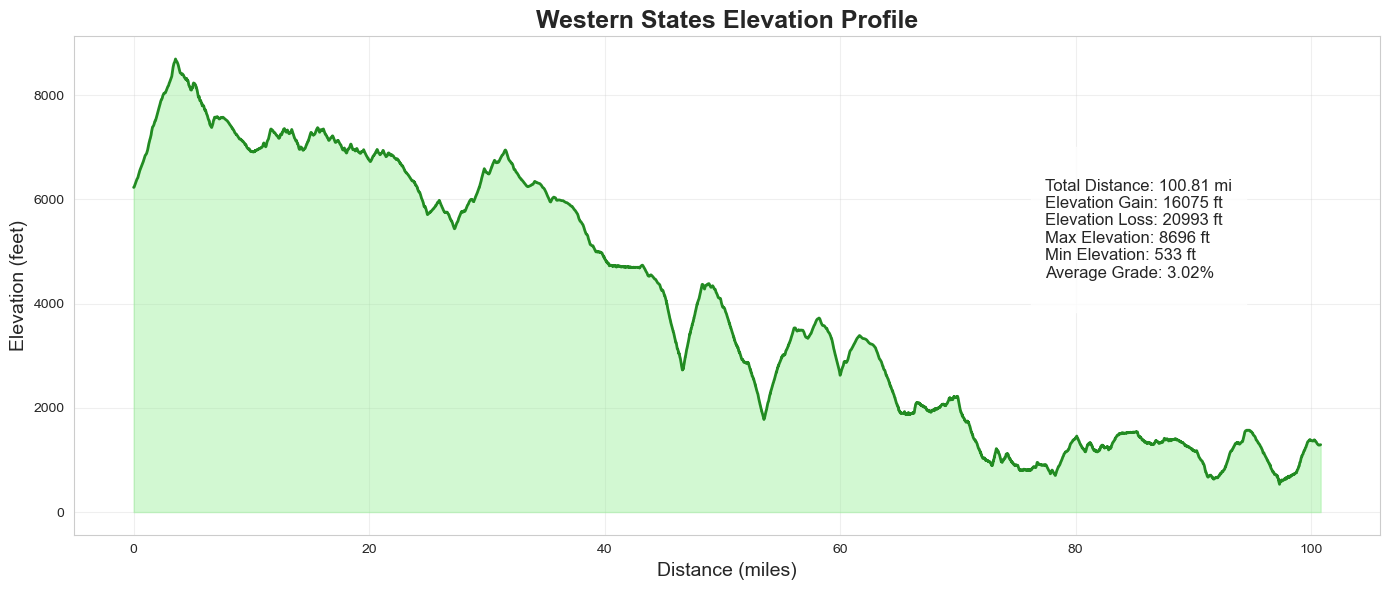

In [59]:

# === Seaborn Styling ===
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# Plot elevation profile with gradient fill
plt.plot(distances_mi, elevations_ft, color='forestgreen', linewidth=2)
plt.fill_between(distances_mi, elevations_ft, color='lightgreen', alpha=0.4)

# Title and labels
plt.title("Western States Elevation Profile", fontsize=18, fontweight='bold')
plt.xlabel("Distance (miles)", fontsize=14)
plt.ylabel("Elevation (feet)", fontsize=14)

# Metrics box
metrics_text = f"""
Total Distance: {total_distance_mi:.2f} mi
Elevation Gain: {elevation_gain_ft:.0f} ft
Elevation Loss: {elevation_loss_ft:.0f} ft
Max Elevation: {max_elev_ft:.0f} ft
Min Elevation: {min_elev_ft:.0f} ft
Average Grade: {avg_grade:.2f}%
"""
plt.figtext(0.75, 0.5, metrics_text, fontsize=12, bbox={"facecolor":"white","alpha":0.8,"pad":10})

# Grid and layout
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


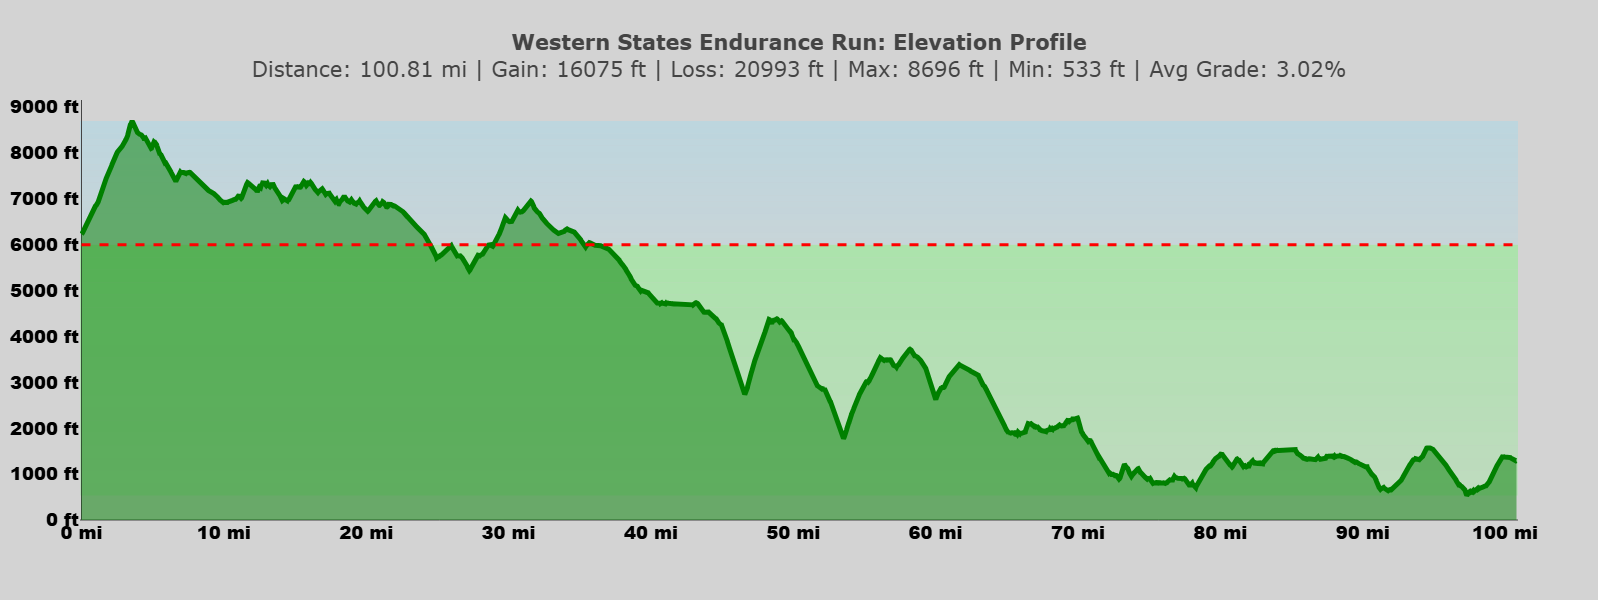

In [76]:
import plotly.graph_objects as go

fig = go.Figure()

# Elevation profile with gradient fill
fig.add_trace(go.Scatter(
    x=distances_mi,
    y=elevations_ft,
    mode='lines',
    fill='tozeroy',
    line=dict(color='green', width=5),
    name='Elevation'
))

# Add reference line at 6000 ft
fig.add_shape(
    type="line",
    x0=min(distances_mi),
    x1=max(distances_mi),
    y0=6000,
    y1=6000,
    line=dict(color="red", width=3, dash="dash"),
    name="6000 ft"
)

# Metrics text
metrics_text = (f"Distance: {total_distance_mi:.2f} mi | "
                f"Gain: {elevation_gain_ft:.0f} ft | "
                f"Loss: {elevation_loss_ft:.0f} ft | "
                f"Max: {max_elev_ft:.0f} ft | Min: {min_elev_ft:.0f} ft | "
                f"Avg Grade: {avg_grade:.2f}%")

# X and Y ticks
x_tick_vals = list(range(0, int(total_distance_mi) + 10, 10))
y_tick_vals = list(range(0, int(max_elev_ft) + 1000, 1000))

# Update layout
fig.update_layout(
    title=f"<b>Western States Endurance Run: Elevation Profile</b><br>{metrics_text}",
    template="presentation",
    font=dict(size=15),
    hovermode="x unified",
    width=1200,
    height=600,
    xaxis=dict(
        showgrid=False,
        tickmode='array',
        tickvals=x_tick_vals,
        ticktext=[f"{val} mi" for val in x_tick_vals],
        tickfont=dict(size=18, family="Arial Black", color="black")
    ),
    yaxis=dict(
        showgrid=False,
        tickmode='array',
        tickvals=y_tick_vals,
        ticktext=[f"{val} ft" for val in y_tick_vals],
        tickfont=dict(size=18, family="Arial Black", color="black")
    ),
    paper_bgcolor="lightgray",
    plot_bgcolor="rgba(0,0,0,0)"
)

# Create smooth gradient effect using multiple semi-transparent rectangles
steps = 20  # number of gradient steps
split_line = 6000

# Gradient for terrain (green) below 6000 ft
for i in range(steps):
    y0 = min_elev_ft + (split_line - min_elev_ft) * i / steps
    y1 = min_elev_ft + (split_line - min_elev_ft) * (i + 1) / steps
    opacity = 0.3 + 0.3 * (i / steps)  # gradually increase opacity
    fig.add_shape(
        type="rect",
        xref="paper", yref="y",
        x0=0, x1=1,
        y0=y0, y1=y1,
        fillcolor=f"rgba(144,238,144,{opacity})",  # light green
        layer="below",
        line=dict(width=0)
    )

# Gradient for sky (blue) above 6000 ft
for i in range(steps):
    y0 = split_line + (max_elev_ft - split_line) * i / steps
    y1 = split_line + (max_elev_ft - split_line) * (i + 1) / steps
    opacity = 0.3 + 0.3 * (i / steps)
    fig.add_shape(
        type="rect",
        xref="paper", yref="y",
        x0=0, x1=1,
        y0=y0, y1=y1,
        fillcolor=f"rgba(173,216,230,{opacity})",  # light blue
        layer="below",
        line=dict(width=0)
    )


fig.write_image('../python_images/wser_elev_profile.png', width = 1200, height = 600)

fig.show()


In [132]:
# with open(r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\grindstone\2025_grindstone_course.gpx', 'r') as f:
#     gpx = gpxpy.parse(f)

# # Check for waypoints
# if gpx.waypoints:
#     for wpt in gpx.waypoints:
#         print(f"POI: {wpt.name} at ({wpt.latitude}, {wpt.longitude})")
# else:
#     print("No standalone POIs found.")

In [9]:
# By default, python reads .gpx files using cp1252 on Windows. Use this code block to detect encoding and parse
# GPX files.

gpx_dir = r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx'

def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        raw_data = f.read(10000)  # Read a chunk for detection
    result = chardet.detect(raw_data)
    return result['encoding']

for filename in os.listdir(gpx_dir):
    if filename.endswith('.gpx'):
        gpx_path = os.path.join(gpx_dir, filename)
        try:
            encoding = detect_encoding(gpx_path)
            with open(gpx_path, 'r', encoding=encoding) as f:
                gpx = gpxpy.parse(f)
            print(f"Parsed: {filename} with encoding {encoding}")
        except Exception as e:
            print(f"Failed to parse {filename}: {e}")


# All gpx files in the gpx folder are encoded in ascii expect for doi_inthanon (utf-8)

Parsed: 2024_black_canyon.gpx with encoding ascii
Parsed: 2025_ccc.gpx with encoding ascii
Parsed: 2025_chianti.gpx with encoding ascii
Parsed: 2025_grindstone.gpx with encoding ascii
Parsed: 2025_tarawera.gpx with encoding ascii
Parsed: 2025_utmb.gpx with encoding ascii
Parsed: bandera.gpx with encoding ascii
Parsed: doi_inthanon.gpx with encoding utf-8
Parsed: javelina_jundred.gpx with encoding ascii
Parsed: nice_cote_d_azur.gpx with encoding ascii
Parsed: the_canyons.gpx with encoding ascii
Parsed: western_states.gpx with encoding ascii


In [9]:
###### Original do not delete


# Unit conversions
meters_to_miles = 0.000621371
meters_to_feet = 3.28084
altitude_threshold_ft = 6000

# Directory containing GPX files
gpx_dir = r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx'

summary_rows = []


for filename in os.listdir(gpx_dir):
    if filename.endswith('.gpx'):
        gpx_path = os.path.join(gpx_dir, filename)
        with open(gpx_path, 'r', encoding = 'utf-8') as f:
            gpx = gpxpy.parse(f)

        # Initialize metrics
        total_distance_m = 0
        elevation_gain_m = 0
        elevation_loss_m = 0
        altitude_exposure_m = 0
        elevations_m = []
        distances_m = []
        steepest_grade_pct = 0

        # Process track points
        for track in gpx.tracks:
            for segment in track.segments:
                prev_point = None
                for point in segment.points:
                    # Skip if elevation data is missing
                    if point.elevation is None or (prev_point and prev_point.elevation is None):
                        prev_point = point
                        continue
        
                    if prev_point:
                        dist = point.distance_3d(prev_point)
                        total_distance_m += dist
                        distances_m.append(total_distance_m)
        
                        delta_elev = point.elevation - prev_point.elevation
                        if delta_elev > 0:
                            elevation_gain_m += delta_elev
                        else:
                            elevation_loss_m -= delta_elev
        
                        if point.elevation * meters_to_feet > altitude_threshold_ft:
                            altitude_exposure_m += dist
                            
                    else:
                        distances_m.append(0)
        
                    elevations_m.append(point.elevation)
                    prev_point = point

                # Loop vs point-to-point
                start_point = segment.points[0]
                end_point = segment.points[-1]
                loop_course = start_point.distance_3d(end_point) < 100  # meters

                # Latitude/Longitude
                latitude = start_point.latitude
                longitude = start_point.longitude


        # Convert units
        total_distance_mi = total_distance_m * meters_to_miles
        elevation_gain_ft = elevation_gain_m * meters_to_feet
        elevation_loss_ft = elevation_loss_m * meters_to_feet
        altitude_exposure_mi = altitude_exposure_m * meters_to_miles
        max_elev_ft = max(elevations_m) * meters_to_feet
        min_elev_ft = min(elevations_m) * meters_to_feet
        elevation_range_ft = max_elev_ft - min_elev_ft
        avg_grade = (elevation_gain_ft / (total_distance_mi * 5280)) * 100 if total_distance_mi > 0 else 0

        print(f"{filename}: distance_mi={total_distance_mi}, gain_ft={elevation_gain_ft}, avg_grade_pct={avg_grade}")

        # Difficulty index
        if total_distance_mi > 0:
            climb_per_mile = elevation_gain_ft / total_distance_mi
            altitude_factor = (altitude_exposure_mi / total_distance_mi) * 5
            grade_factor = (avg_grade / 100) * 5  # New: scaled contribution from average grade
            difficulty_index = climb_per_mile + altitude_factor + grade_factor
        else:
            difficulty_index = 0


        # Extract race name and year
        parts = filename.replace(".gpx", "").split("_")
        year = next((p for p in parts if p.isdigit()), "Unknown")
        race_name = " ".join([p.capitalize() for p in parts if not p.isdigit()])

        # Append Summary
        summary_rows.append({
            "race": race_name,
            "distance_mi": round(total_distance_mi, 2),
            "elevation_gain_ft": round(elevation_gain_ft),
            "elevation_loss_ft": round(elevation_loss_ft),
            "max_elev_ft": round(max_elev_ft),
            "min_elev_ft": round(min_elev_ft),
            "elevation_range_ft": round(elevation_range_ft),
            "avg_grade_pct": round(avg_grade, 2),
            "altitude_exposure_mi": round(altitude_exposure_mi, 2),
            "num_waypoints": len(gpx.waypoints),
            "course_type": "Loop" if loop_course else "Point-to-Point",
            "latitude": round(latitude, 6),
            "longitude": round(longitude, 6),
            "difficulty_index": round(difficulty_index, 2)
        })



2024_black_canyon.gpx: distance_mi=62.92641324785885, gain_ft=5604.5605467999985, avg_grade_pct=1.6868430055743253
2025_ccc.gpx: distance_mi=62.53021697811954, gain_ft=20049.2650338432, avg_grade_pct=6.072598929316748
2025_chianti.gpx: distance_mi=74.91844315087893, gain_ft=19799.9260497572, avg_grade_pct=5.005424347540253
2025_grindstone.gpx: distance_mi=65.71083971944554, gain_ft=11043.30744, avg_grade_pct=3.1829383233114585
2025_tarawera.gpx: distance_mi=63.69181190997359, gain_ft=11148.976972056476, avg_grade_pct=3.315259223484958
2025_utmb.gpx: distance_mi=108.689381262916, gain_ft=34480.13977709299, avg_grade_pct=6.0082497732144216
bandera.gpx: distance_mi=62.6422989655882, gain_ft=6820.86636, avg_grade_pct=2.0622339398968283
doi_inthanon.gpx: distance_mi=106.87983792878207, gain_ft=36187.82009392605, avg_grade_pct=6.412578778641785
Gorge_Waterfalls_100k_2017.gpx: distance_mi=64.5684368928694, gain_ft=12279.19986799999, avg_grade_pct=3.6017691421966056
javelina_jundred.gpx: dista

In [10]:
df_summary = pd.DataFrame(summary_rows)
print("\n📋 Summary DataFrame:")
df_summary = df_summary.sort_values(by = 'difficulty_index', ascending = False)
df_summary


📋 Summary DataFrame:


race  distance_mi  elevation_gain_ft  elevation_loss_ft  \
13               Templiers        63.29              23405              23290   
7             Doi Inthanon       106.88              36188              36135   
1                      Ccc        62.53              20049              20640   
5                     Utmb       108.69              34480              34477   
12       Sean O Brien 100k        62.87              18019              18019   
2                  Chianti        74.92              19800              19798   
11        Nice Cote D Azur        68.07              15854              20222   
14             The Canyons        61.70              13620              17367   
15  The Georgia Death Race        74.38              15971              16388   
10          Lake sonoma 50        50.49              10567              10567   
16          Western States       100.81              20386              25325   
8    Gorge Waterfalls 100k        64.57              12279              12276   
4                 Tarawera        63.69              11149              10348   
3               Grindstone        65.71              11043              11043   
6                  Bandera        62.64               6821               6896   
0             Black Canyon        62.93               5605               7726   
9         Javelina Jundred        98.43               6626               6626   

    max_elev_ft  min_elev_ft  elevation_range_ft  avg_grade_pct  \
13         2949         1178                1772           7.00   
7          6769          973                5796           6.41   
1          8406         3408                4999           6.07   
5          8325         2658                5667           6.01   
12         2395           66                2329           5.43   
2          2957          949                2008           5.01   
11         6071           12                6059           4.41   
14         5017          547                4470           4.18   
15         4331         1647                2684           4.07   
10         1163          232                 931           3.96   
16         8696          533                8163           3.83   
8          1519           30                1490           3.60   
4          2396          130                2267           3.32   
3          4331         1329                3002           3.18   
6          1998         1401                 597           2.06   
0          4190         1741                2450           1.69   
9          2482         1625                 857           1.27   

    altitude_exposure_mi  num_waypoints     course_type   latitude  \
13                  0.00              0  Point-to-Point  44.113770   
7                   2.40             14  Point-to-Point  18.487380   
1                  23.83              0  Point-to-Point  45.792841   
5                  37.40              0            Loop  45.923539   
12                  0.00              5            Loop  34.096440   
2                   0.00              0            Loop  43.486612   
11                  0.55              0  Point-to-Point  44.093119   
14                  0.00             11  Point-to-Point  39.151387   
15                  0.00              0  Point-to-Point  34.765919   
10                  0.00              0            Loop  38.717820   
16                 31.26             22  Point-to-Point  39.195617   
8                   0.00              0            Loop  45.576702   
4                   0.00             10  Point-to-Point -38.096145   
3                   0.00              8            Loop  38.358370   
6                   0.00              0            Loop  29.648547   
0                   0.00              9  Point-to-Point  34.347600   
9                   0.00              3            Loop  33.672820   

     longitude  difficulty_index  
13    3.087040            370.17  
7    98.666660           

In [ ]:
df_summary.to_csv("../data/master/gpx_summary_master.csv", index=False)

#### This is the version of course metadata that will be used. The dataset now appears to be the mostly accurate or at least defensible. Variations due to GPX glitches are expected.

In [11]:
## ================= ##
##  DIFFICULTY INDEX ##
## ================= ##


# GPX processing with elevation smoothing + hysteresis for gain/loss,
# debounced climbs (avg-grade gated), lenient longest-climb tracker,
# windowed descent-by-grade, heading-based turns, and feature scaling.

import os
import math
import statistics
import gpxpy

# -------------------
# Unit conversions
# -------------------
meters_to_miles = 0.000621371
meters_to_feet = 3.28084

# -------------------
# Core thresholds
# -------------------
altitude_threshold_ft = 6000

# "Major/extra climb" windows (strict counters)
major_climb_threshold_gain_ft = 500
major_climb_threshold_distance_m = 3218   # 2 miles
extra_climb_threshold_gain_ft = 1500
extra_climb_threshold_distance_m = 6437   # 4 miles
super_climb_threshold_gain_ft = 2000      # extra multiplier tier (once per race)

# Debounce/shape for strict climb counters
MAJOR_MIN_AVG_GRADE = 0.06               # ≥6% avg grade over counted window
MAJOR_MIN_DISTANCE_M = 800
minor_descent_reset_ft = 200             # allow undulating climbs to persist
max_climb_distance_m = 12000             # cap a single strict climb (~7.5 mi)
CLIMB_COOLDOWN_M = 1200                  # cooldown after counting a climb (↑ from 800 m)

# Longest climb logic (lenient tracker; separate from strict counters)
LONGEST_ALLOWABLE_DROP_FT = 800          # allow up to ~800 ft loss within a "continuous" climb
LONGEST_MAX_FLAT_M = 200                 # allow ~200 m of flat inside a climb

# Elevation processing
ELEV_SMOOTH_WINDOW = 9                   # rolling median window (odd)
HYSTERESIS_M = 1.0                       # <<< FIX (was 2.0): flush gain/loss after ≥1.0 m net
GRADE_SPIKE_CAP = 1.20                   # <<< FIX (was 0.80): allow steeper single-step before clipping
MIN_ELEV_DELTA_M_PER_STEP = 0.3          # ignore <30 cm for climb logic

# Descent/turn detection
DESCENT_WINDOW_M = 150
STEEP_DESCENT_GRADE = -15.0              # %
TURN_HEADING_DEG = 45.0
TURN_MIN_STEP_M = 20.0

# Directory containing GPX files
gpx_dir = r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx'

summary_rows = []

# -------------------
# Helpers
# -------------------
def heading_deg(p1, p2):
    lat1 = math.radians(p1.latitude); lat2 = math.radians(p2.latitude)
    dlon = math.radians(p2.longitude - p1.longitude)
    x = dlon * math.cos((lat1 + lat2) / 2.0); y = lat2 - lat1
    ang = math.degrees(math.atan2(x, y))
    return (ang + 360.0) % 360.0

def rolling_median(vals, w):
    k = w // 2
    out = []
    n = len(vals)
    for i in range(n):
        i0 = max(0, i - k)
        i1 = min(n, i + k + 1)
        window = sorted(vals[i0:i1])
        m = len(window)
        if m % 2:
            out.append(window[m//2])
        else:
            out.append(0.5*(window[m//2 - 1] + window[m//2]))
    return out

# -------------------
# Main GPX processing
# -------------------
for filename in os.listdir(gpx_dir):
    if not filename.endswith('.gpx'):
        continue

    gpx_path = os.path.join(gpx_dir, filename)
    with open(gpx_path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    # Initialize metrics
    total_distance_m = 0.0
    elevation_gain_m = 0.0        # HYSTERESIS-based total gain
    elevation_loss_m = 0.0        # HYSTERESIS-based total loss
    altitude_exposure_m = 0.0
    elevations_m = []             # smoothed elevations (for grade/series only)
    raw_elevations_m = []         # <<< FIX: collect raw elevations for extrema

    grades = []

    # Strict climb counters
    major_climb_count = 0
    extra_climb_weight = 0
    super_climb_applied = False
    current_climb_gain_m = 0.0
    current_climb_distance_m = 0.0
    climb_cooldown_remaining_m = 0.0

    # Lenient longest climb tracker
    longest_climb_gain_m = 0.0
    longest_climb_distance_m = 0.0
    lenient_climb_gain_m = 0.0
    lenient_climb_dist_m = 0.0
    lenient_climb_drop_m = 0.0
    lenient_flat_m = 0.0

    steep_descent_factor = 0
    turn_count = 0

    loop_course = False
    latitude = None
    longitude = None

    for track in gpx.tracks:
        for segment in track.segments:
            pts = [p for p in segment.points if p.elevation is not None]
            if not pts:
                continue

            # Smooth elevations
            raw_elev = [p.elevation for p in pts]
            sm_elev = rolling_median(raw_elev, ELEV_SMOOTH_WINDOW)

            # segment endpoints for loop/lats
            start_point = pts[0]; end_point = pts[-1]
            loop_course = start_point.distance_3d(end_point) < 100
            latitude = start_point.latitude
            longitude = start_point.longitude

            prev_point = None
            prev_heading = None

            # windowed descent grade
            window_dist_m = 0.0
            window_elev_delta_m = 0.0

            # hysteresis buffers
            up_buf = 0.0
            down_buf = 0.0

            for i, point in enumerate(pts):
                elev = sm_elev[i]

                if prev_point is not None:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist

                    delta_elev = elev - sm_elev[i-1]

                    # Drop impossible spikes by instantaneous grade
                    if dist > 0:
                        inst_grade = abs(delta_elev) / dist
                        if inst_grade > GRADE_SPIKE_CAP:
                            delta_elev = 0.0

                    # ---------- HYSTERESIS for total gain/loss ----------
                    if delta_elev > 0:
                        up_buf += delta_elev
                        if down_buf > 0 and down_buf >= HYSTERESIS_M:
                            elevation_loss_m += down_buf
                        down_buf = 0.0
                        if up_buf >= HYSTERESIS_M:
                            elevation_gain_m += up_buf
                            up_buf = 0.0
                    elif delta_elev < 0:
                        down_buf += -delta_elev
                        if up_buf > 0 and up_buf >= HYSTERESIS_M:
                            elevation_gain_m += up_buf
                        up_buf = 0.0
                        if down_buf >= HYSTERESIS_M:
                            elevation_loss_m += down_buf
                            down_buf = 0.0

                    # ---------- STRICT climb/desc logic (for counts) ----------
                    step_delta = delta_elev if abs(delta_elev) >= MIN_ELEV_DELTA_M_PER_STEP else 0.0

                    # cooldown tick
                    if climb_cooldown_remaining_m > 0:
                        climb_cooldown_remaining_m = max(0.0, climb_cooldown_remaining_m - dist)

                    if step_delta > 0:
                        current_climb_gain_m += step_delta
                        current_climb_distance_m += dist

                        # cap strict climb window
                        if current_climb_distance_m > max_climb_distance_m:
                            current_climb_gain_m = 0.0
                            current_climb_distance_m = 0.0

                        # gate by avg grade for major/extra counts
                        avg_grade_ok = (
                            current_climb_distance_m >= MAJOR_MIN_DISTANCE_M and
                            (current_climb_gain_m / current_climb_distance_m) >= MAJOR_MIN_AVG_GRADE
                        )

                        if (current_climb_gain_m * meters_to_feet >= major_climb_threshold_gain_ft and
                            current_climb_distance_m <= major_climb_threshold_distance_m and
                            avg_grade_ok and
                            climb_cooldown_remaining_m == 0.0):
                            major_climb_count += 1
                            climb_cooldown_remaining_m = CLIMB_COOLDOWN_M
                            current_climb_gain_m = 0.0
                            current_climb_distance_m = 0.0

                        # rule: long grinders (≥1000 ft gain within ≤5 miles AND ≥4% avg grade)
                        avg_grade_long_ok = (
                            current_climb_distance_m > 0 and
                            (current_climb_gain_m / current_climb_distance_m) >= 0.04  # 4%
                        )

                        if (current_climb_gain_m * meters_to_feet >= 1000 and
                            current_climb_distance_m <= (5 * 1609.34) and
                            avg_grade_long_ok and
                            climb_cooldown_remaining_m == 0.0):
                            major_climb_count += 1
                            climb_cooldown_remaining_m = CLIMB_COOLDOWN_M
                            current_climb_gain_m = 0.0
                            current_climb_distance_m = 0.0

                        # extra climb weighting (debounced)
                        if (current_climb_gain_m * meters_to_feet >= extra_climb_threshold_gain_ft and
                            current_climb_distance_m <= extra_climb_threshold_distance_m and
                            avg_grade_ok and
                            climb_cooldown_remaining_m == 0.0):
                            extra_climb_weight += 3
                            climb_cooldown_remaining_m = CLIMB_COOLDOWN_M
                            current_climb_gain_m = 0.0
                            current_climb_distance_m = 0.0

                        # super climb once
                        if (not super_climb_applied and
                            current_climb_gain_m * meters_to_feet >= super_climb_threshold_gain_ft):
                            extra_climb_weight += 2
                            super_climb_applied = True

                    elif step_delta < 0:
                        # reset strict climb only on meaningful descent
                        if (-step_delta) * meters_to_feet > minor_descent_reset_ft:
                            current_climb_gain_m = 0.0
                            current_climb_distance_m = 0.0

                    # ---------- LENIENT longest-climb tracker ----------
                    if step_delta > 0:
                        # uphill
                        lenient_climb_gain_m += step_delta
                        lenient_climb_dist_m += dist
                        # uphill eats into prior drop
                        lenient_climb_drop_m = max(0.0, lenient_climb_drop_m - step_delta)
                        lenient_flat_m = 0.0

                    elif step_delta < 0:
                        # downhill; allow some drop inside the long climb
                        lenient_climb_dist_m += dist
                        lenient_climb_drop_m += (-step_delta)

                        # too much drop → finalize & reset
                        if (lenient_climb_drop_m * meters_to_feet) > LONGEST_ALLOWABLE_DROP_FT:
                            if lenient_climb_gain_m > longest_climb_gain_m:
                                longest_climb_gain_m = lenient_climb_gain_m
                                longest_climb_distance_m = lenient_climb_dist_m
                            lenient_climb_gain_m = 0.0
                            lenient_climb_dist_m = 0.0
                            lenient_climb_drop_m = 0.0
                            lenient_flat_m = 0.0
                    else:
                        # flat step; allow brief flats
                        lenient_climb_dist_m += dist
                        lenient_flat_m += dist
                        if lenient_flat_m > LONGEST_MAX_FLAT_M:
                            if lenient_climb_gain_m > longest_climb_gain_m:
                                longest_climb_gain_m = lenient_climb_gain_m
                                longest_climb_distance_m = lenient_climb_dist_m
                            lenient_climb_gain_m = 0.0
                            lenient_climb_dist_m = 0.0
                            lenient_climb_drop_m = 0.0
                            lenient_flat_m = 0.0

                    # keep best up-to-date
                    if lenient_climb_gain_m > longest_climb_gain_m:
                        longest_climb_gain_m = lenient_climb_gain_m
                        longest_climb_distance_m = lenient_climb_dist_m

                    # ---------- Altitude exposure ----------
                    if elev * meters_to_feet >= altitude_threshold_ft:
                        altitude_exposure_m += dist

                    # ---------- Grade series (smoothed) ----------
                    if dist > 0:
                        grades.append((step_delta / dist) * 100.0)

                    # ---------- Windowed steep descent by avg grade ----------
                    window_dist_m += dist
                    window_elev_delta_m += step_delta
                    if window_dist_m >= DESCENT_WINDOW_M:
                        avg_g = (window_elev_delta_m / window_dist_m) * 100.0
                        if avg_g <= STEEP_DESCENT_GRADE:
                            steep_descent_factor += 1
                        window_dist_m = 0.0
                        window_elev_delta_m = 0.0

                    # ---------- Turn detection (spacing + heading) ----------
                    if dist >= TURN_MIN_STEP_M:
                        h = heading_deg(prev_point, point)
                        if prev_heading is not None:
                            d = abs(h - prev_heading); d = min(d, 360.0 - d)
                            if d >= TURN_HEADING_DEG:
                                turn_count += 1
                                prev_heading = h
                        else:
                            prev_heading = h

                # --- Collect elevations (raw for extrema, smoothed for series) ---
                raw_elevations_m.append(point.elevation)   # <<< FIX: raw for max/min
                elevations_m.append(elev)                  # smoothed for grades/series

                prev_point = point

            # flush remaining hysteresis at end of segment (unconditionally) <<< FIX
            elevation_gain_m += up_buf
            elevation_loss_m += down_buf
            up_buf = down_buf = 0.0

    # -------------------
    # Summaries & factors
    # -------------------
    total_distance_mi = total_distance_m * meters_to_miles
    elevation_gain_ft = elevation_gain_m * meters_to_feet
    elevation_loss_ft = elevation_loss_m * meters_to_feet
    altitude_exposure_mi = altitude_exposure_m * meters_to_miles

    # <<< FIX: extrema from RAW elevations (not smoothed)
    if raw_elevations_m:
        max_elev_ft = max(raw_elevations_m) * meters_to_feet
        min_elev_ft = min(raw_elevations_m) * meters_to_feet
    else:
        max_elev_ft = 0.0
        min_elev_ft = 0.0

    elevation_range_ft = max_elev_ft - min_elev_ft
    avg_grade = (elevation_gain_ft / (total_distance_mi * 5280.0)) * 100.0 if total_distance_mi > 0 else 0.0
    grade_variability = statistics.pstdev(grades) if grades else 0.0

    # Longest climb (sanity cap cannot exceed total gain)
    longest_climb_ft = min(longest_climb_gain_m * meters_to_feet, elevation_gain_ft)

    # Derived factors (stored raw for scaling)
    climb_per_mile = (elevation_gain_ft / total_distance_mi) if total_distance_mi > 0 else 0.0
    altitude_factor = ((altitude_exposure_mi / total_distance_mi) * 8.0) if total_distance_mi > 0 else 0.0
    grade_factor = (avg_grade / 100.0) * 5.0
    endurance_factor = max(0.0, ((total_distance_mi - 61.7) / (108.7 - 61.7)) * 10.0)
    climb_distribution_factor = major_climb_count * 2 + extra_climb_weight
    longest_climb_factor = (longest_climb_ft / 1000.0) * 2.0
    turn_density = (turn_count / total_distance_mi) if total_distance_mi > 0 else 0.0
    technicality_factor = (grade_variability * 0.3) + (turn_density * 0.05)
    steep_descent_penalty = steep_descent_factor * 1.5

    # Parse filename for display name
    parts = filename.replace(".gpx", "").split("_")
    year = next((p for p in parts if p.isdigit()), "Unknown")
    race_name = " ".join([p.capitalize() for p in parts if not p.isdigit()])

    summary_rows.append({
        "race": race_name,
        "distance_mi": round(total_distance_mi, 2),
        "elevation_gain_ft": round(elevation_gain_ft),
        "elevation_loss_ft": round(elevation_loss_ft),
        "max_elev_ft": round(max_elev_ft),
        "min_elev_ft": round(min_elev_ft),
        "elevation_range_ft": round(elevation_range_ft),
        "avg_grade_pct": round(avg_grade, 2),
        "altitude_exposure_mi": round(altitude_exposure_mi, 2),
        "major_climb_count": major_climb_count,
        "longest_climb_ft": round(longest_climb_ft),
        "grade_variability": round(grade_variability, 2),
        "steep_descent_count": steep_descent_factor,
        "turn_density": round(turn_density, 2),
        "course_type": "Loop" if loop_course else "Point-to-Point",
        "latitude": round(latitude, 6) if latitude is not None else None,
        "longitude": round(longitude, 6) if longitude is not None else None,

        # raw features for scaling
        "_climb_per_mile": climb_per_mile,
        "_altitude_factor": altitude_factor,
        "_grade_factor": grade_factor,
        "_endurance_factor": endurance_factor,
        "_climb_distribution_factor": climb_distribution_factor,
        "_longest_climb_factor": longest_climb_factor,
        "_steep_descent_penalty": steep_descent_penalty,
        "_technicality_factor": technicality_factor,
    })

# -------------------
# Feature scaling & difficulty index (5–100)
# -------------------
if summary_rows:
    features = [
        "_climb_per_mile",
        "_altitude_factor",
        "_grade_factor",
        "_endurance_factor",
        "_climb_distribution_factor",
        "_longest_climb_factor",
        "_steep_descent_penalty",
        "_technicality_factor",
    ]
    mins = {f: min(r[f] for r in summary_rows) for f in features}
    maxs = {f: max(r[f] for r in summary_rows) for f in features}

    def scale(v, f):
        mn, mx = mins[f], maxs[f]
        return 0.0 if mx == mn else (v - mn) / (mx - mn)

    weights = {
        "_climb_per_mile": 0.30,
        "_altitude_factor": 0.30,
        "_grade_factor": 0.10,
        "_endurance_factor": 0.10,
        "_climb_distribution_factor": 0.10,
        "_longest_climb_factor": 0.05,
        "_steep_descent_penalty": 0.025,
        "_technicality_factor": 0.025,
    }

    min_raw = float("inf"); max_raw = float("-inf")
    for r in summary_rows:
        score = sum(weights[f] * scale(r[f], f) for f in features)
        r["_raw_score"] = score
        if score < min_raw: min_raw = score
        if score > max_raw: max_raw = score

    for r in summary_rows:
        if max_raw == min_raw:
            r["difficulty_index"] = 5.0
        else:
            r["difficulty_index"] = round(5 + ((r["_raw_score"] - min_raw) / (max_raw - min_raw)) * 95, 2)
        for f in features + ["_raw_score"]:
            r.pop(f, None)

# -------------------
# Output
# -------------------
for row in summary_rows:
    print(row)

{'race': 'Black Canyon', 'distance_mi': 62.93, 'elevation_gain_ft': 4501, 'elevation_loss_ft': 6634, 'max_elev_ft': 4190, 'min_elev_ft': 1741, 'elevation_range_ft': 2450, 'avg_grade_pct': 1.35, 'altitude_exposure_mi': 0.0, 'major_climb_count': 5, 'terrain_class': 'Rolling', 'longest_climb_ft': 645, 'grade_variability': 6.02, 'steep_descent_count': 1, 'turn_density': 8.3, 'course_type': 'Point-to-Point', 'latitude': 34.3476, 'longitude': -112.15755, 'difficulty_index': 5.0}
{'race': 'Ccc', 'distance_mi': 62.53, 'elevation_gain_ft': 19020, 'elevation_loss_ft': 19617, 'max_elev_ft': 8406, 'min_elev_ft': 3408, 'elevation_range_ft': 4999, 'avg_grade_pct': 5.76, 'altitude_exposure_mi': 23.83, 'major_climb_count': 14, 'terrain_class': 'Mountainous', 'longest_climb_ft': 1469, 'grade_variability': 16.97, 'steep_descent_count': 89, 'turn_density': 0.18, 'course_type': 'Point-to-Point', 'latitude': 45.792841, 'longitude': 6.971575, 'difficulty_index': 81.0}
{'race': 'Chianti', 'distance_mi': 74.9

In [12]:
df_summary = pd.DataFrame(summary_rows)
print("\n📋 Summary DataFrame:")
df_summary = df_summary.sort_values(by = 'difficulty_index', ascending = False)
df_summary


📋 Summary DataFrame:


race  distance_mi  elevation_gain_ft  elevation_loss_ft  \
5                     Utmb       108.69              32155              32173   
1                      Ccc        62.53              19020              19617   
7             Doi Inthanon       106.88              28349              28285   
16          Western States       100.81              16075              20993   
11        Nice Cote D Azur        68.07              15655              20025   
13               Templiers        63.29              14177              14052   
15  The Georgia Death Race        74.38              15866              16283   
2                  Chianti        74.92              15662              15744   
12       Sean O Brien 100k        62.87              13164              13146   
14             The Canyons        61.70              11166              14923   
8    Gorge Waterfalls 100k        64.57              11268              11251   
10          Lake sonoma 50        50.49               8265               8249   
3               Grindstone        65.71               9843               9839   
4                 Tarawera        63.69               7389               6630   
6                  Bandera        62.64               6778               6854   
9         Javelina Jundred        98.43               5190               5194   
0             Black Canyon        62.93               4501               6634   

    max_elev_ft  min_elev_ft  elevation_range_ft  avg_grade_pct  \
5          8325         2658                5667           5.60   
1          8406         3408                4999           5.76   
7          6769          973                5796           5.02   
16         8696          533                8163           3.02   
11         6071           12                6059           4.36   
13         2949         1178                1772           4.24   
15         4331         1647                2684           4.04   
2          2957          949                2008           3.96   
12         2395           66                2329           3.97   
14         5017          547                4470           3.43   
8          1519           30                1490           3.31   
10         1163          232                 931           3.10   
3          4331         1329                3002           2.84   
4          2396          130                2267           2.20   
6          1998         1401                 597           2.05   
9          2482         1625                 857           1.00   
0          4190         1741                2450           1.35   

    altitude_exposure_mi  major_climb_count terrain_class  longest_climb_ft  \
5                  37.38                 52   Mountainous              4339   
1                  23.83                 14   Mountainous              1469   
7                   2.40                 51   Mountainous              4092   
16                 31.18                 30   Mountainous              2449   
11                  0.55                 24       Rolling              2837   
13                  0.00                 25       Rolling              1562   
15                  0.00                 15       Rolling              2392   
2                   0.00                 22       Rolling               768   
12                  0.00                 25       Rolling              1711   
14                  0.00                 20       Rolling              1805   
8                   0.00                 19       Rolling              1401   
10                  0.00                 16       Rolling               700   
3                   0.00                 14       Rolling              1096   
4                   0.00                 11       Rolling               981   
6                   0.00                  6       Rolling               322   
9                   0.00                  0          Flat               355   
0            

In [13]:
df_summary["race"] = df_summary["race"].replace({"Ccc": "CCC", "Utmb":"UTMB", "Nice Cote D Azur":"Nice Cote d'Azur", "The georgia death race": "The Georgia Death Race", "Lake sonoma 50": "Lake Sonoma 50"})

In [14]:
df_summary

race  distance_mi  elevation_gain_ft  elevation_loss_ft  \
5                     UTMB       108.69              32155              32173   
1                      CCC        62.53              19020              19617   
7             Doi Inthanon       106.88              28349              28285   
16          Western States       100.81              16075              20993   
11        Nice Cote d'Azur        68.07              15655              20025   
13               Templiers        63.29              14177              14052   
15  The Georgia Death Race        74.38              15866              16283   
2                  Chianti        74.92              15662              15744   
12       Sean O Brien 100k        62.87              13164              13146   
14             The Canyons        61.70              11166              14923   
8    Gorge Waterfalls 100k        64.57              11268              11251   
10          Lake Sonoma 50        50.49               8265               8249   
3               Grindstone        65.71               9843               9839   
4                 Tarawera        63.69               7389               6630   
6                  Bandera        62.64               6778               6854   
9         Javelina Jundred        98.43               5190               5194   
0             Black Canyon        62.93               4501               6634   

    max_elev_ft  min_elev_ft  elevation_range_ft  avg_grade_pct  \
5          8325         2658                5667           5.60   
1          8406         3408                4999           5.76   
7          6769          973                5796           5.02   
16         8696          533                8163           3.02   
11         6071           12                6059           4.36   
13         2949         1178                1772           4.24   
15         4331         1647                2684           4.04   
2          2957          949                2008           3.96   
12         2395           66                2329           3.97   
14         5017          547                4470           3.43   
8          1519           30                1490           3.31   
10         1163          232                 931           3.10   
3          4331         1329                3002           2.84   
4          2396          130                2267           2.20   
6          1998         1401                 597           2.05   
9          2482         1625                 857           1.00   
0          4190         1741                2450           1.35   

    altitude_exposure_mi  major_climb_count terrain_class  longest_climb_ft  \
5                  37.38                 52   Mountainous              4339   
1                  23.83                 14   Mountainous              1469   
7                   2.40                 51   Mountainous              4092   
16                 31.18                 30   Mountainous              2449   
11                  0.55                 24       Rolling              2837   
13                  0.00                 25       Rolling              1562   
15                  0.00                 15       Rolling              2392   
2                   0.00                 22       Rolling               768   
12                  0.00                 25       Rolling              1711   
14                  0.00                 20       Rolling              1805   
8                   0.00                 19       Rolling              1401   
10                  0.00                 16       Rolling               700   
3                   0.00                 14       Rolling              1096   
4                   0.00                 11       Rolling               981   
6                   0.00                  6       Rolling               322   
9                   0.00                  0          Flat               355   
0            

In [16]:
df_summary.to_csv("../../data/course_metadata_v2.csv")

In [80]:
course_metadata = pd.read_csv('../../data/master/master_csv/course_metadata.csv')

### Update difficulty index using a variation of ITRA scoring with additional elevation_loss_ft and altitude_exposure_ft

### Formula: Effort km = Distance (km) + (Gain (m) + Loss (m))/100 + Altitude Exposure (km)

In [39]:
races = pd.read_csv("../../data/course_metadata_v2.csv")

In [40]:
# Conversion factors
MI_TO_KM = 1.60934
FT_TO_M = 0.3048

# Calculate new columns directly
races["distance_km"] = races["distance_mi"] * MI_TO_KM
races["gain_m"] = races["elevation_gain_ft"] * FT_TO_M
races["loss_m"] = races["elevation_loss_ft"] * FT_TO_M
races["altitude_exposure_km"] = races["altitude_exposure_mi"] * MI_TO_KM

races["effort_km"] = (
    races["distance_km"]
    + (races["gain_m"] + races["loss_m"]) / 100
    + races["altitude_exposure_km"]
)

# Round values
races["distance_km"] = races["distance_km"].round(2)
races["gain_m"] = races["gain_m"].round(0)
races["loss_m"] = races["loss_m"].round(0)
races["altitude_exposure_km"] = races["altitude_exposure_km"].round(2)
races["effort_km"] = races["effort_km"].round(1)

# Normalize
max_effort_km = races["effort_km"].max()
races["normalized_index"] = (races["effort_km"] / max_effort_km) * 100
races["normalized_index"] = races["normalized_index"].round(1)

races

# # Print table
# print(f"{'Race':35} {'Dist (km)':>10} {'Gain (m)':>10} {'Loss (m)':>10} {'AltExp (km)':>12} {'Effort km':>12} {'Index':>8}")
# print("-" * 95)
# for _, race in races.iterrows():
#     print(f"{race['race']:35} {race['distance_km']:10.2f} {int(race['gain_m']):10} {int(race['loss_m']):10} {race['altitude_exposure_km']:12.2f} {race['effort_km']:12.1f} {race['normalized_index']:8.1f}")

race  distance_mi  elevation_gain_ft  elevation_loss_ft  \
0                     UTMB       108.69              32155              32173   
1             Doi Inthanon       106.88              28349              28285   
2           Western States       100.81              16075              20993   
3                      CCC        62.53              19020              19617   
4         Nice Cote d'Azur        68.07              15655              20025   
5   The Georgia Death Race        74.38              15866              16283   
6                  Chianti        74.92              15662              15744   
7         Javelina Jundred        98.43               5190               5194   
8                Templiers        63.29              14177              14052   
9        Sean O Brien 100k        62.87              13164              13146   
10             The Canyons        61.70              11166              14923   
11   Gorge Waterfalls 100k        64.57              11268              11251   
12              Grindstone        65.71               9843               9839   
13                Tarawera        63.69               7389               6630   
14                 Bandera        62.64               6778               6854   
15            Black Canyon        62.93               4501               6634   
16          Lake Sonoma 50        50.49               8265               8249   

    max_elev_ft  min_elev_ft  elevation_range_ft  avg_grade_pct  \
0          8325         2658                5667           5.60   
1          6769          973                5796           5.02   
2          8696          533                8163           3.02   
3          8406         3408                4999           5.76   
4          6071           12                6059           4.36   
5          4331         1647                2684           4.04   
6          2957          949                2008           3.96   
7          2482         1625                 857           1.00   
8          2949         1178                1772           4.24   
9          2395           66                2329           3.97   
10         5017          547                4470           3.43   
11         1519           30                1490           3.31   
12         4331         1329                3002           2.84   
13         2396          130                2267           2.20   
14         1998         1401                 597           2.05   
15         4190         1741                2450           1.35   
16         1163          232                 931           3.10   

    altitude_exposure_mi  major_climb_count  longest_climb_ft   latitude  \
0                  37.38                 52              4339  45.923539   
1                   2.40                 51              4092  18.487380   
2                  31.18                 30              2449  39.195617   
3                  23.83                 14              1469  45.792841   
4                   0.55                 24              2837  44.093119   
5                   0.00                 15              2392  34.765919   
6                   0.00                 22               768  43.486612   
7                   0.00                  0               355  33.672820   
8                   0.00                 25              1562  44.113770   
9                   0.00                 25              1711  34.096440   
10                  0.00                 20              1805  39.151387   
11                  0.00                 19              1401  45.576702   
12                  0.00                 14              1096  38.358370   
13                  0.00                 11               981 -38.096145   
14                  0.00                  6               322  29.648547   
15                  0.00                  5               645  34.347600   
16                  0.00                 16               700  3

In [42]:
races.to_csv('../../data/course_data_w_diff_index.csv')

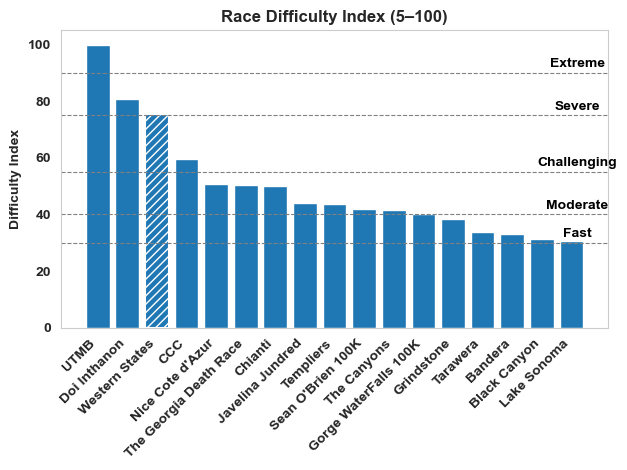

In [50]:
#### RACE DIFFICULTY INDEX BARCHART ######

import matplotlib.pyplot as plt

# Sort hardest → easiest
df_sorted = race_diff_index_revised.sort_values("Difficulty_Index", ascending=False).reset_index(drop=True)

df_sorted["Race Name"] = df_sorted["Race Name"].replace({"Festival Des Templiers":"Templiers", "Nice Cote D Azur":"Nice Cote d'Azur"})

# Build figure
plt.figure()
bars = plt.bar(df_sorted["Race Name"], df_sorted["Difficulty_Index"])

plt.title("Race Difficulty Index (5–100)", fontweight="bold")
plt.xlabel("")
plt.ylabel("Difficulty Index", fontweight="bold")
plt.xticks(rotation=45, ha='right', fontweight="bold")
plt.yticks(fontweight="bold")
plt.grid(False)

# --- Add tier lines + formal-ish labels (optional) ---

tiers = [
    (90, "Extreme"),
    (75, "Severe"),
    (55, "Challenging"),
    (40, "Moderate"),
    (30, "Fast")
]
x_center = len(df_sorted) - 0.8

for y, label in tiers:
    plt.axhline(y=y, linestyle='--', linewidth=0.8, color='gray')
    plt.text(x_center, y + 1, label, ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# --- Highlight Western States (no custom colors used) ---
target_name = "Western States"
if (df_sorted["Race Name"] == target_name).any():
    idx = df_sorted.index[df_sorted["Race Name"] == target_name][0]
    # Add a hatch + thicker edge to the target bar
    bars[idx].set_hatch("////")
    bars[idx].set_linewidth(1.5)
    # Annotate with an arrow above the bar
    y = df_sorted.loc[idx, "Difficulty_Index"]

plt.tight_layout()

# plt.savefig('../python_images/race_diff_index_bar_chart.png', dpi = 300)

plt.show()

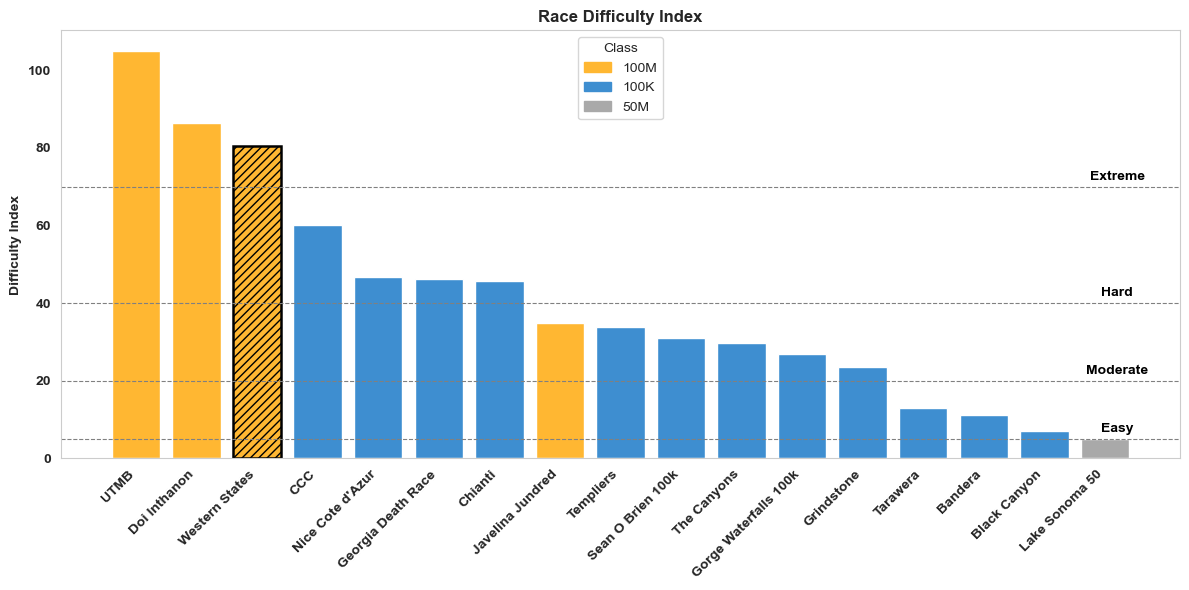

In [86]:
import matplotlib.patches as mpatches

# Sort hardest → easiest
df_sorted = course_metadata.sort_values("Log_Scale", ascending=False).reset_index(drop=True)

# Clean race names
df_sorted["Race_Name"] = df_sorted["Race_Name"].replace({
    "Festival Des Templiers":"Templiers",
    "Nice Cote D Azur":"Nice Cote d'Azur",
    "The Georgia Death Race":"Georgia Death Race"
})

# Assign colors (optional subtle differentiation)
color_map = {"100M": "#FFB732", "100K": "#3E8ED0", "50M": "#A9A9A9"}
bar_colors = df_sorted["Race_Class"].map(color_map)

plt.figure(figsize=(12,6))
bars = plt.bar(df_sorted["Race_Name"], df_sorted["Log_Scale"], color=bar_colors)

plt.title("Race Difficulty Index", fontweight="bold")
plt.ylabel("Difficulty Index", fontweight="bold")
plt.xticks(rotation=45, ha='right', fontweight="bold")
plt.yticks(fontweight="bold")
plt.grid(False)


# --- Add legend ---
legend_handles = [
    mpatches.Patch(color="#FFB732", label="100M"),
    mpatches.Patch(color="#3E8ED0", label="100K"),
    mpatches.Patch(color="#A9A9A9", label="50M")
]
plt.legend(handles=legend_handles, title="Class", loc="upper center")


# --- Difficulty tiers ---

tiers = [
    (70, "Extreme"),
    (40, "Hard"),
    (20, "Moderate"),
    (5, "Easy")
]
x_center = len(df_sorted) - 0.8

for y, label in tiers:
    plt.axhline(y=y, linestyle='--', linewidth=0.8, color='gray')
    plt.text(x_center, y + 1, label, ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')


# # --- Label 100M races above bars ---
# for i, row in df_sorted.iterrows():
#     if row["Race_Class"] == "100M":
#         plt.text(
#             i,
#             row["Difficulty_Index"] + 2,
#             "100M",
#             ha='center',
#             va='bottom',
#             fontsize=8,
#             fontweight='bold'
#         )

# --- Highlight Western States ---
target_name = "Western States"
if (df_sorted["Race_Name"] == target_name).any():
    idx = df_sorted.index[df_sorted["Race_Name"] == target_name][0]
    bars[idx].set_hatch("////")
    bars[idx].set_linewidth(1.8)
    bars[idx].set_edgecolor("black")

plt.tight_layout()

plt.savefig('../python_images/race_diff_index_revised_bar_chart.png', dpi = 300)

plt.show()


In [99]:
# Normalize difficulty index with a floor
all_difficulties = [row["difficulty_index"] for row in summary_rows]
min_diff = min(all_difficulties)
max_diff = max(all_difficulties)

for row in summary_rows:
    if max_diff > min_diff:
        normalized = 5 + (row["difficulty_index"] - min_diff) / (max_diff - min_diff) * 95
        row["difficulty_index_normalized"] = round(normalized, 2)
    else:
        row["difficulty_index_normalized"] = 5  # fallback if all values are equal


In [100]:
df = pd.DataFrame(summary_rows)
df

race  distance_mi  elevation_gain_ft  elevation_loss_ft  \
0       Black Canyon        62.93               5605               7726   
1                Ccc        62.53              20049              20640   
2            Chianti        74.92              19800              19798   
3         Grindstone        65.71              11043              11043   
4           Tarawera        63.69              11149              10348   
5               Utmb       108.69              34480              34477   
6            Bandera        62.64               6821               6896   
7       Doi Inthanon       106.88              36188              36135   
8   Javelina Jundred        98.43               6626               6626   
9   Nice Cote D Azur        68.07              15854              20222   
10       The Canyons        61.70              13620              17367   
11    Western States       100.81              20386              25325   

    max_elev_ft  min_elev_ft  elevation_range_ft  avg_grade_pct  \
0          4190         1741                2450           1.69   
1          8406         3408                4999           6.07   
2          2957          949                2008           5.01   
3          4331         1329                3002           3.18   
4          2396          130                2267           3.32   
5          8325         2658                5667           6.01   
6          1998         1401                 597           2.06   
7          6769          973                5796           6.41   
8          2482         1625                 857           1.27   
9          6071           12                6059           4.41   
10         5017          547                4470           4.18   
11         8696          533                8163           3.83   

    altitude_exposure_mi  num_waypoints     course_type   latitude  \
0                   4.53              9  Point-to-Point  34.347600   
1                  57.75              0  Point-to-Point  45.792841   
2                   0.00              0            Loop  43.486612   
3                   1.25              8            Loop  38.358370   
4                   0.00             10  Point-to-Point -38.096145   
5                  85.40              0            Loop  45.923539   
6                   0.00              0            Loop  29.648547   
7                  39.60             14  Point-to-Point  18.487380   
8                   0.00              3            Loop  33.672820   
9                  19.89              0  Point-to-Point  44.093119   
10                  8.54             11  Point-to-Point  39.151387   
11                 47.32             22  Point-to-Point  39.195617   

     longitude  difficulty_index  difficulty_index_normalized  
0  -112.157550             89.51                        12.69  
1     6.971575            325.55                        94.71  
2    11.374433            264.54                        73.51  
3   -79.083630            168.31                        40.07  
4   176.707157            175.21                        42.47  
5     6.869039            321.46                        93.29  
6   -99.200051            108.99                        19.46  
7    98.666660            340.76                       100.00  
8  -111.701700             67.38                         5.00  
9     7.051349            234.59                        63.11  
10 -120.676731            221.65                        58.61  
11 -120.236341            204.77                        52.74

In [69]:
##### Original code for course stats
# Unit conversions
meters_to_miles = 0.000621371
meters_to_feet = 3.28084
altitude_threshold_ft = 6000

# Directory containing GPX files
gpx_dir = r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx'

summary_rows = []
difficulty_values = []

for filename in os.listdir(gpx_dir):
    if filename.endswith('.gpx'):
        gpx_path = os.path.join(gpx_dir, filename)
        with open(gpx_path, 'r', encoding='utf-8') as f:
            gpx = gpxpy.parse(f)

        # Initialize metrics
        total_distance_m = 0
        elevation_gain_m = 0
        elevation_loss_m = 0
        altitude_exposure_m = 0
        elevations_m = []
        distances_m = []
        steepest_grade_pct = 0

        # Process track points
        for track in gpx.tracks:
            for segment in track.segments:
                prev_point = None
                for point in segment.points:
                    if point.elevation is None or (prev_point and prev_point.elevation is None):
                        prev_point = point
                        continue

                    if prev_point:
                        dist = point.distance_3d(prev_point)
                        total_distance_m += dist
                        distances_m.append(total_distance_m)

                        delta_elev = point.elevation - prev_point.elevation
                        if delta_elev > 0:
                            elevation_gain_m += delta_elev
                        else:
                            elevation_loss_m -= delta_elev

                        # Calculate steepest grade
                        if dist > 0:
                            grade_pct = (delta_elev / dist) * 100
                            steepest_grade_pct = max(steepest_grade_pct, grade_pct)

                        # Altitude exposure above threshold
                        if point.elevation * meters_to_feet > altitude_threshold_ft:
                            altitude_exposure_m += dist
                    else:
                        distances_m.append(0)

                    elevations_m.append(point.elevation)
                    prev_point = point

                # Loop vs point-to-point
                start_point = segment.points[0]
                end_point = segment.points[-1]
                loop_course = start_point.distance_3d(end_point) < 100

                latitude = start_point.latitude
                longitude = start_point.longitude

        # Convert units
        total_distance_mi = total_distance_m * meters_to_miles
        elevation_gain_ft = elevation_gain_m * meters_to_feet
        elevation_loss_ft = elevation_loss_m * meters_to_feet
        altitude_exposure_mi = altitude_exposure_m * meters_to_miles
        max_elev_ft = max(elevations_m) * meters_to_feet
        min_elev_ft = min(elevations_m) * meters_to_feet
        elevation_range_ft = max_elev_ft - min_elev_ft
        avg_grade = (elevation_gain_ft / (total_distance_mi * 5280)) * 100 if total_distance_mi > 0 else 0

        # Difficulty index with endurance adjustment
        if total_distance_mi > 0:
            climb_per_mile = elevation_gain_ft / total_distance_mi
            altitude_factor = (altitude_exposure_mi / total_distance_mi) * 5
            grade_factor = (avg_grade / 100) * 5

            # Progressive endurance factor
            baseline_distance = 62  # 100K baseline
            alpha = 0.5
            endurance_factor = 1 + alpha * ((total_distance_mi - baseline_distance) / baseline_distance) if total_distance_mi > baseline_distance else 1

            # Add baseline constant to avoid near-zero values
            base_constant = 10
            difficulty_index = (climb_per_mile + altitude_factor + grade_factor + base_constant) * endurance_factor
        else:
            difficulty_index = 0

        difficulty_values.append(difficulty_index)

        # Extract race name and year
        parts = filename.replace(".gpx", "").split("_")
        year = next((p for p in parts if p.isdigit()), "Unknown")
        race_name = " ".join([p.capitalize() for p in parts if not p.isdigit()])

        summary_rows.append({
            "race": race_name,
            "distance_mi": round(total_distance_mi, 2),
            "elevation_gain_ft": round(elevation_gain_ft),
            "elevation_loss_ft": round(elevation_loss_ft),
            "max_elev_ft": round(max_elev_ft),
            "min_elev_ft": round(min_elev_ft),
            "elevation_range_ft": round(elevation_range_ft),
            "avg_grade_pct": round(avg_grade, 2),
            "altitude_exposure_mi": round(altitude_exposure_mi, 2),
            "num_waypoints": len(gpx.waypoints),
            "course_type": "Loop" if loop_course else "Point-to-Point",
            "latitude": round(latitude, 6),
            "longitude": round(longitude, 6),
            "steepest_grade_pct": round(steepest_grade_pct, 2),
            "difficulty_index": round(difficulty_index, 2)
        })

# Normalize difficulty index
min_diff = min(difficulty_values)
max_diff = max(difficulty_values)
for row in summary_rows:
    raw_diff = row["difficulty_index"]
    row["normalized_difficulty"] = round(((raw_diff - min_diff) / (max_diff - min_diff)) * 100, 2)

# Output final summary
print("Final Summary Table:")
for row in summary_rows:
    print(row)


Final Summary Table:
{'race': 'Black Canyon', 'distance_mi': 62.93, 'elevation_gain_ft': 5605, 'elevation_loss_ft': 7726, 'max_elev_ft': 4190, 'min_elev_ft': 1741, 'elevation_range_ft': 2450, 'avg_grade_pct': 1.69, 'altitude_exposure_mi': 4.53, 'num_waypoints': 9, 'course_type': 'Point-to-Point', 'latitude': 34.3476, 'longitude': -112.15755, 'steepest_grade_pct': 46.52, 'difficulty_index': 100.25, 'normalized_difficulty': 0.04}
{'race': 'Ccc', 'distance_mi': 62.53, 'elevation_gain_ft': 20049, 'elevation_loss_ft': 20640, 'max_elev_ft': 8406, 'min_elev_ft': 3408, 'elevation_range_ft': 4999, 'avg_grade_pct': 6.07, 'altitude_exposure_mi': 57.75, 'num_waypoints': 0, 'course_type': 'Point-to-Point', 'latitude': 45.792841, 'longitude': 6.971575, 'steepest_grade_pct': 100.0, 'difficulty_index': 336.99, 'normalized_difficulty': 62.73}
{'race': 'Chianti', 'distance_mi': 74.92, 'elevation_gain_ft': 19800, 'elevation_loss_ft': 19798, 'max_elev_ft': 2957, 'min_elev_ft': 949, 'elevation_range_ft': 2

In [ ]:

#After computing difficulty_index (with endurance factor)
difficulty_values.append(difficulty_index)  # Collect all for normalization later

# After processing all GPX files:
min_diff = min(difficulty_values)
max_diff = max(difficulty_values)

# Normalize each difficulty index to 0–100 scale
normalized_difficulty = ((difficulty_index - min_diff) / (max_diff - min_diff)) * 100


In [109]:
df_summary.to_csv("../data/master/gpx_summary_master.csv", index=False)

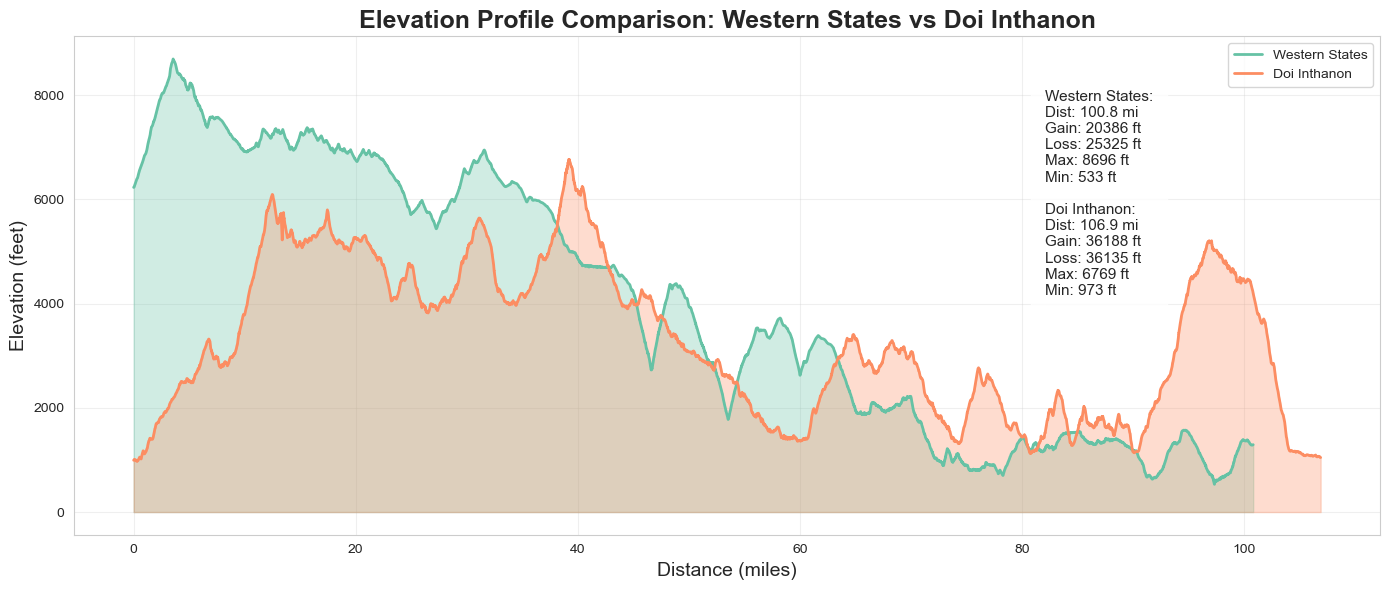

In [34]:

sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

routes = {
    "Western States": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx',
    "Doi Inthanon": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\doi_inthanon.gpx',
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes))

metrics_summary = []

for (name, path), color in zip(routes.items(), colors):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    distances_mi = [d * meters_to_miles for d in distances_m]
    elevations_ft = [e * meters_to_feet for e in elevations_m]

    # Metrics
    total_distance_mi = total_distance_m * meters_to_miles
    elevation_gain_ft = elevation_gain_m * meters_to_feet
    elevation_loss_ft = elevation_loss_m * meters_to_feet
    max_elev_ft = max(elevations_ft)
    min_elev_ft = min(elevations_ft)

    metrics_summary.append(
        f"{name}:\nDist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_ft:.0f} ft\nLoss: {elevation_loss_ft:.0f} ft\nMax: {max_elev_ft:.0f} ft\nMin: {min_elev_ft:.0f} ft"
    )

    # Plot with gradient fill
    plt.plot(distances_mi, elevations_ft, label=name, linewidth=2, color=color)
    plt.fill_between(distances_mi, elevations_ft, color=color, alpha=0.3)

# Add metrics box
metrics_text = "\n\n".join(metrics_summary)
plt.figtext(0.75, 0.5, metrics_text, fontsize=11, bbox={"facecolor":"white","alpha":0.8,"pad":10})

# Titles and labels
plt.title("Elevation Profile Comparison: Western States vs Doi Inthanon", fontsize=18, fontweight='bold')
plt.xlabel("Distance (miles)", fontsize=14)
plt.ylabel("Elevation (feet)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


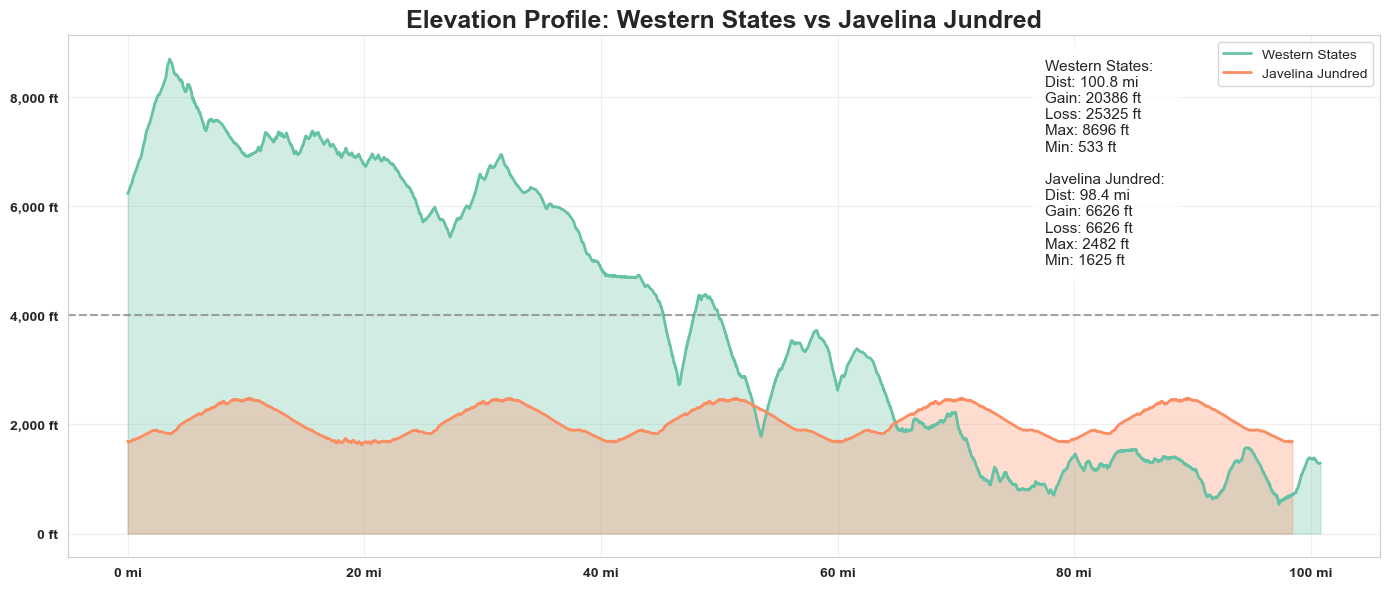

In [179]:
import matplotlib.ticker as ticker

sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

routes = {
    "Western States": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx',
    "Javelina Jundred": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\javelina_jundred.gpx'
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes))

metrics_summary = []

for (name, path), color in zip(routes.items(), colors):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    distances_mi = [d * meters_to_miles for d in distances_m]
    elevations_ft = [e * meters_to_feet for e in elevations_m]

    # Metrics
    total_distance_mi = total_distance_m * meters_to_miles
    elevation_gain_ft = elevation_gain_m * meters_to_feet
    elevation_loss_ft = elevation_loss_m * meters_to_feet
    max_elev_ft = max(elevations_ft)
    min_elev_ft = min(elevations_ft)


    metrics_summary.append(
        f"{name}:\nDist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_ft:.0f} ft\nLoss: {elevation_loss_ft:.0f} ft\nMax: {max_elev_ft:.0f} ft\nMin: {min_elev_ft:.0f} ft"
    )

    # Plot with gradient fill
    plt.plot(distances_mi, elevations_ft, label=name, linewidth=2, color=color)
    plt.fill_between(distances_mi, elevations_ft, color=color, alpha=0.3)

# Add metrics box
metrics_text = "\n\n".join(metrics_summary)
plt.figtext(0.75, 0.55, metrics_text, fontsize=11, bbox={"facecolor":"white","alpha":0.8,"pad":10})

# ---- Format X ticks with "mi" ----
ax = plt.gca()  # get current axes
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x)} mi"))

# ---- Format Y ticks with "ft" ----
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f"{int(y):,} ft"))

# ---- Add dotted horizontal line at 6000 ft ----
plt.axhline(6000, linestyle="--", color="gray", alpha=0.7)

# Titles and labels
plt.title("Elevation Profile: Western States vs Javelina Jundred", fontsize=18, fontweight='bold')
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../python_images/ws_vs_jj.png', dpi = 300)
plt.show()

In [28]:

import chardet
rawdata = open(r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\doi_inthanon.gpx', 'rb').read()
result = chardet.detect(rawdata)
print(result)


{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


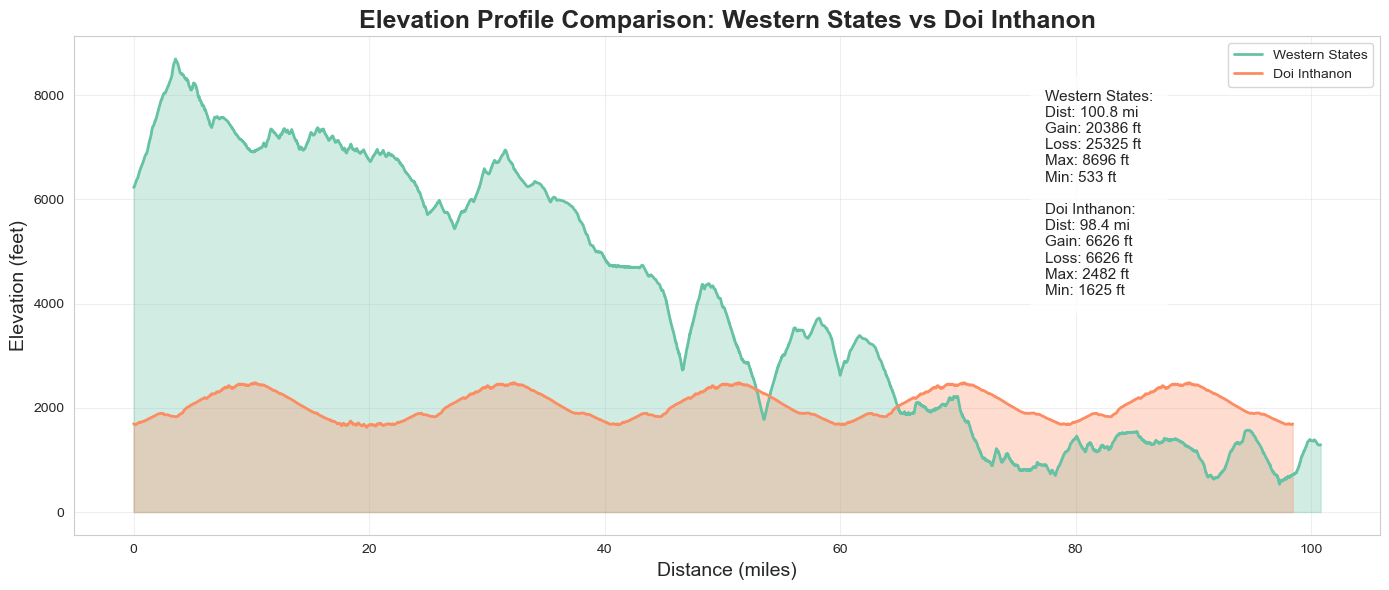

In [35]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

routes = {
    "Western States": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx',
    "Javelina Jundred": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\javelina_jundred.gpx',
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes))

metrics_summary = []

for (name, path), color in zip(routes.items(), colors):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    distances_mi = [d * meters_to_miles for d in distances_m]
    elevations_ft = [e * meters_to_feet for e in elevations_m]

    # Metrics
    total_distance_mi = total_distance_m * meters_to_miles
    elevation_gain_ft = elevation_gain_m * meters_to_feet
    elevation_loss_ft = elevation_loss_m * meters_to_feet
    max_elev_ft = max(elevations_ft)
    min_elev_ft = min(elevations_ft)

    metrics_summary.append(
        f"{name}:\nDist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_ft:.0f} ft\nLoss: {elevation_loss_ft:.0f} ft\nMax: {max_elev_ft:.0f} ft\nMin: {min_elev_ft:.0f} ft"
    )

    # Plot with gradient fill
    plt.plot(distances_mi, elevations_ft, label=name, linewidth=2, color=color)
    plt.fill_between(distances_mi, elevations_ft, color=color, alpha=0.3)

# Add metrics box
metrics_text = "\n\n".join(metrics_summary)
plt.figtext(0.75, 0.5, metrics_text, fontsize=11, bbox={"facecolor":"white","alpha":0.8,"pad":10})

# Titles and labels
plt.title("Elevation Profile Comparison: Western States vs Javelina Jundred", fontsize=18, fontweight='bold')
plt.xlabel("Distance (miles)", fontsize=14)
plt.ylabel("Elevation (feet)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

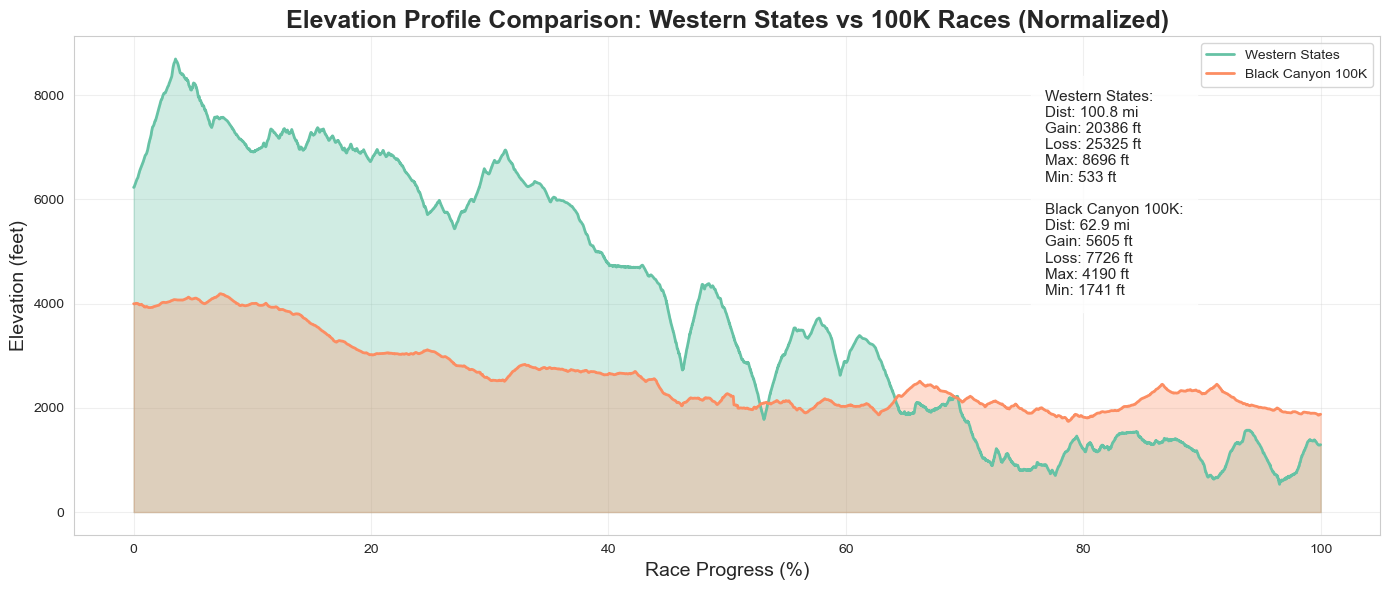

In [36]:

# Replace these paths with your actual GPX files
routes = {
    "Western States": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx',
    "Black Canyon 100K": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2024_black_canyon.gpx'
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes))

metrics_summary = []

plt.figure(figsize=(14, 6))

for (name, path), color in zip(routes.items(), colors):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    # Convert to feet and miles
    total_distance_mi = total_distance_m * meters_to_miles
    elevations_ft = [e * meters_to_feet for e in elevations_m]

    # Normalize distances to percentage of race completed
    distances_pct = [(d * meters_to_miles) / total_distance_mi * 100 for d in distances_m]

    # Metrics
    elevation_gain_ft = elevation_gain_m * meters_to_feet
    elevation_loss_ft = elevation_loss_m * meters_to_feet
    max_elev_ft = max(elevations_ft)
    min_elev_ft = min(elevations_ft)

    metrics_summary.append(
        f"{name}:\nDist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_ft:.0f} ft\nLoss: {elevation_loss_ft:.0f} ft\nMax: {max_elev_ft:.0f} ft\nMin: {min_elev_ft:.0f} ft"
    )

    # Plot normalized profile
    plt.plot(distances_pct, elevations_ft, label=name, linewidth=2, color=color)
    plt.fill_between(distances_pct, elevations_ft, color=color, alpha=0.3)

# Add metrics box
metrics_text = "\n\n".join(metrics_summary)
plt.figtext(0.75, 0.5, metrics_text, fontsize=11, bbox={"facecolor":"white","alpha":0.8,"pad":10})

# Titles and labels
plt.title("Elevation Profile Comparison: Western States vs 100K Races (Normalized)", fontsize=18, fontweight='bold')
plt.xlabel("Race Progress (%)", fontsize=14)
plt.ylabel("Elevation (feet)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


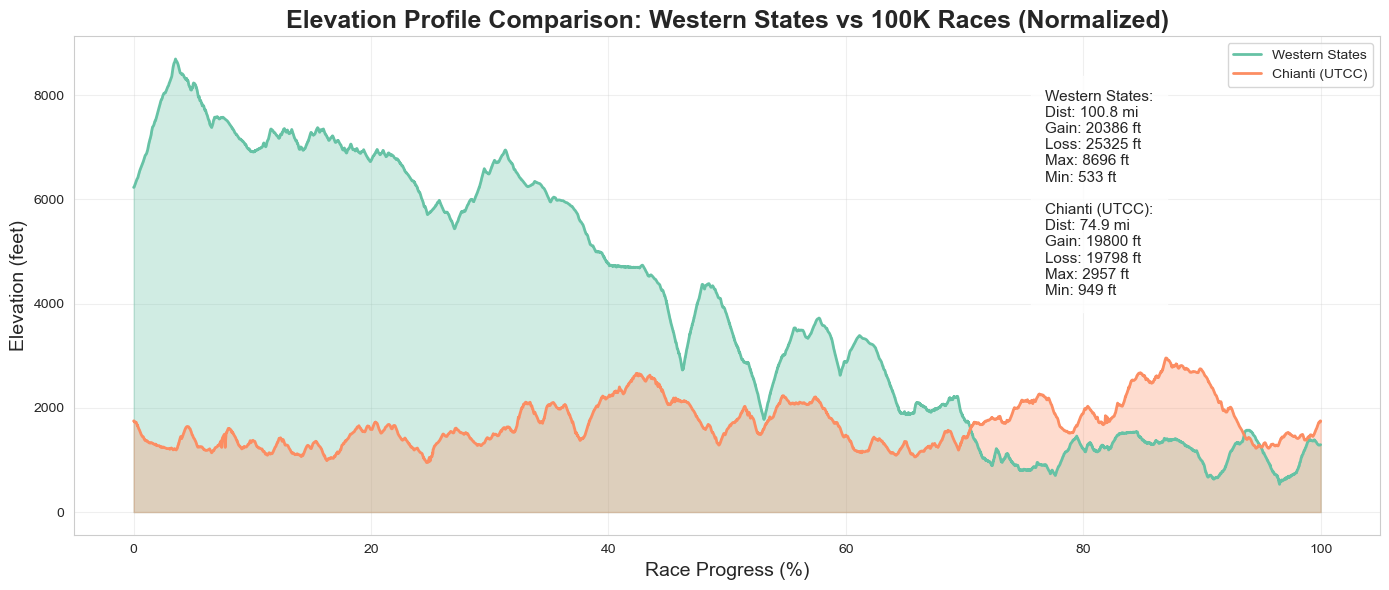

In [39]:
routes = {
    "Western States": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx',
    "Chianti (UTCC)": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_chianti.gpx'
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes))

metrics_summary = []

plt.figure(figsize=(14, 6))

for (name, path), color in zip(routes.items(), colors):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    # Convert to feet and miles
    total_distance_mi = total_distance_m * meters_to_miles
    elevations_ft = [e * meters_to_feet for e in elevations_m]

    # Normalize distances to percentage of race completed
    distances_pct = [(d * meters_to_miles) / total_distance_mi * 100 for d in distances_m]

    # Metrics
    elevation_gain_ft = elevation_gain_m * meters_to_feet
    elevation_loss_ft = elevation_loss_m * meters_to_feet
    max_elev_ft = max(elevations_ft)
    min_elev_ft = min(elevations_ft)

    metrics_summary.append(
        f"{name}:\nDist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_ft:.0f} ft\nLoss: {elevation_loss_ft:.0f} ft\nMax: {max_elev_ft:.0f} ft\nMin: {min_elev_ft:.0f} ft"
    )

    # Plot normalized profile
    plt.plot(distances_pct, elevations_ft, label=name, linewidth=2, color=color)
    plt.fill_between(distances_pct, elevations_ft, color=color, alpha=0.3)

# Add metrics box
metrics_text = "\n\n".join(metrics_summary)
plt.figtext(0.75, 0.5, metrics_text, fontsize=11, bbox={"facecolor":"white","alpha":0.8,"pad":10})

# Titles and labels
plt.title("Elevation Profile Comparison: Western States vs 100K Races (Normalized)", fontsize=18, fontweight='bold')
plt.xlabel("Race Progress (%)", fontsize=14)
plt.ylabel("Elevation (feet)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

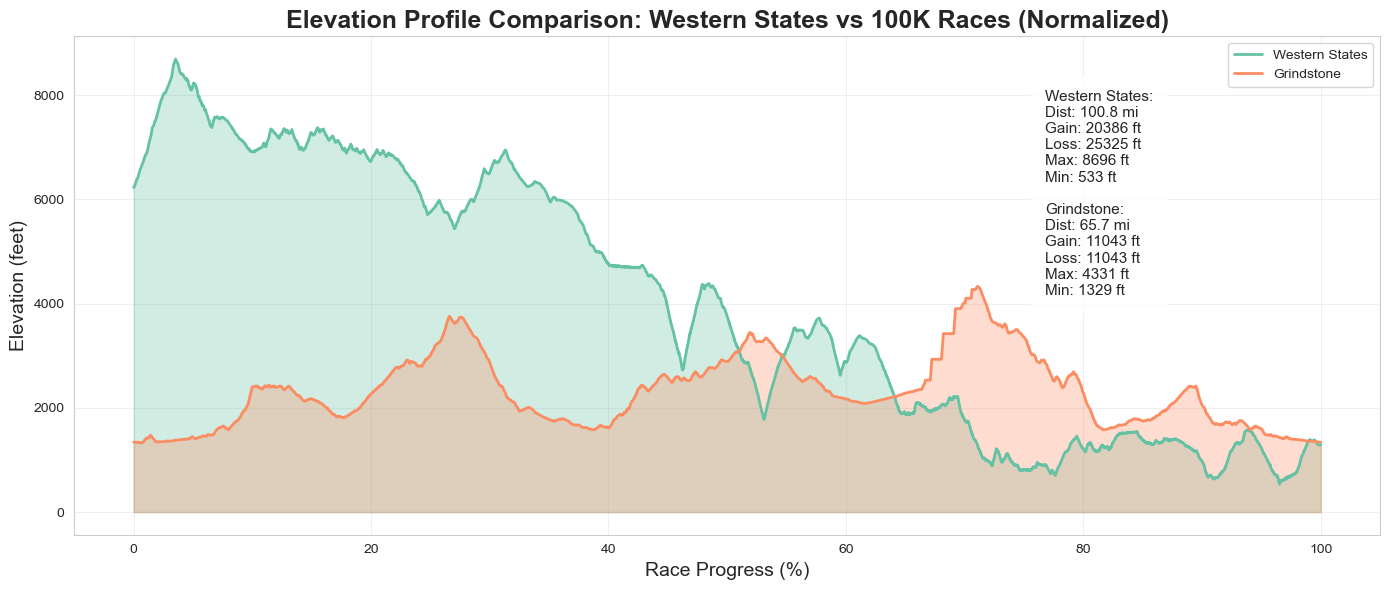

In [38]:
routes = {
    "Western States": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx',
    "Grindstone": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_grindstone.gpx'
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes))

metrics_summary = []

plt.figure(figsize=(14, 6))

for (name, path), color in zip(routes.items(), colors):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    # Convert to feet and miles
    total_distance_mi = total_distance_m * meters_to_miles
    elevations_ft = [e * meters_to_feet for e in elevations_m]

    # Normalize distances to percentage of race completed
    distances_pct = [(d * meters_to_miles) / total_distance_mi * 100 for d in distances_m]

    # Metrics
    elevation_gain_ft = elevation_gain_m * meters_to_feet
    elevation_loss_ft = elevation_loss_m * meters_to_feet
    max_elev_ft = max(elevations_ft)
    min_elev_ft = min(elevations_ft)

    metrics_summary.append(
        f"{name}:\nDist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_ft:.0f} ft\nLoss: {elevation_loss_ft:.0f} ft\nMax: {max_elev_ft:.0f} ft\nMin: {min_elev_ft:.0f} ft"
    )

    # Plot normalized profile
    plt.plot(distances_pct, elevations_ft, label=name, linewidth=2, color=color)
    plt.fill_between(distances_pct, elevations_ft, color=color, alpha=0.3)

# Add metrics box
metrics_text = "\n\n".join(metrics_summary)
plt.figtext(0.75, 0.5, metrics_text, fontsize=11, bbox={"facecolor":"white","alpha":0.8,"pad":10})

# Titles and labels
plt.title("Elevation Profile Comparison: Western States vs 100K Races (Normalized)", fontsize=18, fontweight='bold')
plt.xlabel("Race Progress (%)", fontsize=14)
plt.ylabel("Elevation (feet)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

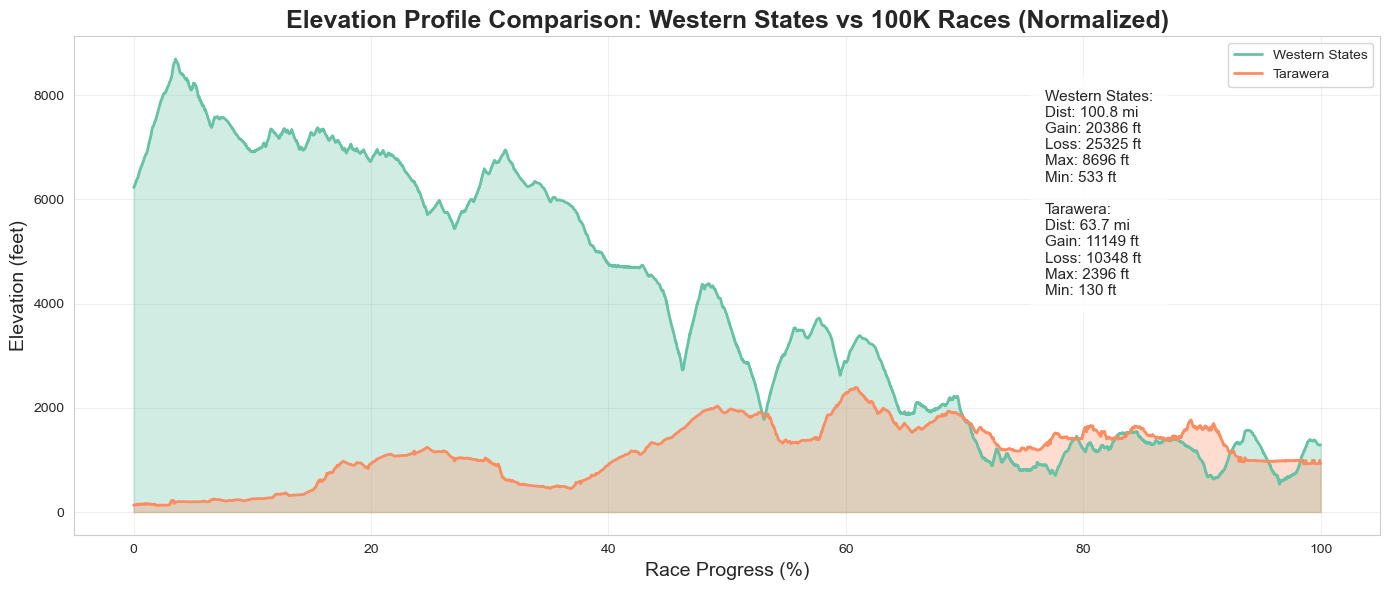

In [39]:
routes = {
    "Western States": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx',
    "Tarawera": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_tarawera.gpx'
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes))

metrics_summary = []

plt.figure(figsize=(14, 6))

for (name, path), color in zip(routes.items(), colors):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    # Convert to feet and miles
    total_distance_mi = total_distance_m * meters_to_miles
    elevations_ft = [e * meters_to_feet for e in elevations_m]

    # Normalize distances to percentage of race completed
    distances_pct = [(d * meters_to_miles) / total_distance_mi * 100 for d in distances_m]

    # Metrics
    elevation_gain_ft = elevation_gain_m * meters_to_feet
    elevation_loss_ft = elevation_loss_m * meters_to_feet
    max_elev_ft = max(elevations_ft)
    min_elev_ft = min(elevations_ft)

    metrics_summary.append(
        f"{name}:\nDist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_ft:.0f} ft\nLoss: {elevation_loss_ft:.0f} ft\nMax: {max_elev_ft:.0f} ft\nMin: {min_elev_ft:.0f} ft"
    )

    # Plot normalized profile
    plt.plot(distances_pct, elevations_ft, label=name, linewidth=2, color=color)
    plt.fill_between(distances_pct, elevations_ft, color=color, alpha=0.3)

# Add metrics box
metrics_text = "\n\n".join(metrics_summary)
plt.figtext(0.75, 0.5, metrics_text, fontsize=11, bbox={"facecolor":"white","alpha":0.8,"pad":10})

# Titles and labels
plt.title("Elevation Profile Comparison: Western States vs 100K Races (Normalized)", fontsize=18, fontweight='bold')
plt.xlabel("Race Progress (%)", fontsize=14)
plt.ylabel("Elevation (feet)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

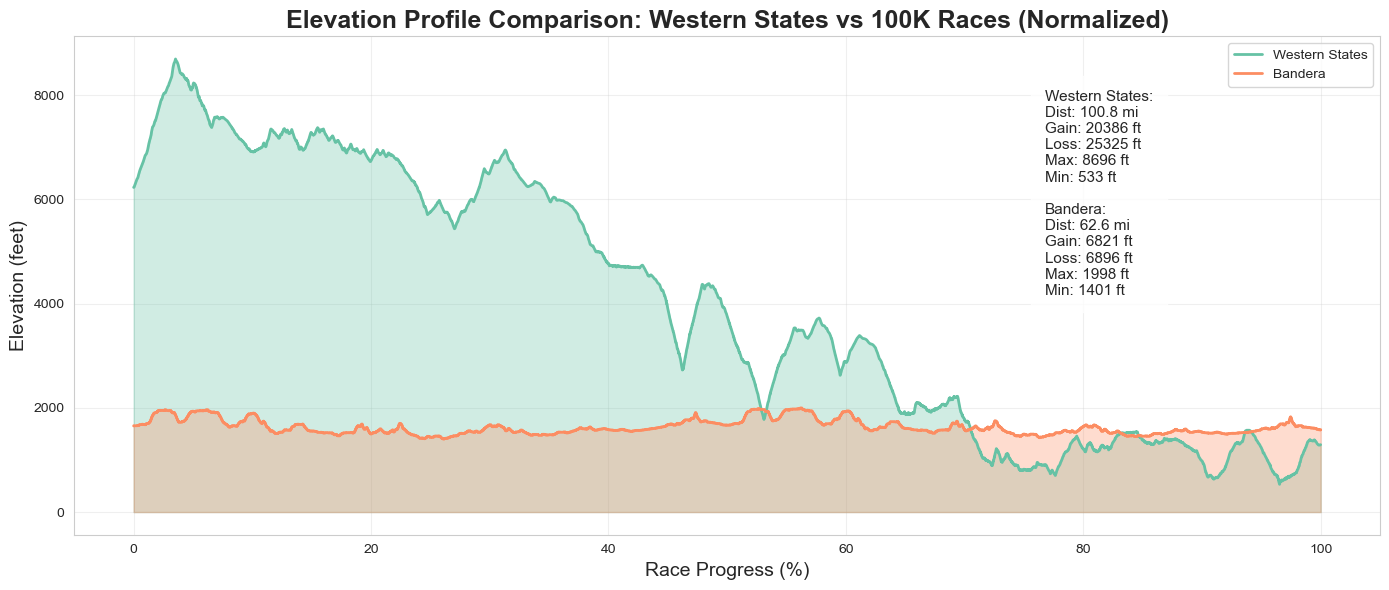

In [44]:
routes = {
    "Western States": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx',
    "Bandera": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\bandera.gpx'
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes))

metrics_summary = []

plt.figure(figsize=(14, 6))

for (name, path), color in zip(routes.items(), colors):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    # Convert to feet and miles
    total_distance_mi = total_distance_m * meters_to_miles
    elevations_ft = [e * meters_to_feet for e in elevations_m]

    # Normalize distances to percentage of race completed
    distances_pct = [(d * meters_to_miles) / total_distance_mi * 100 for d in distances_m]

    # Metrics
    elevation_gain_ft = elevation_gain_m * meters_to_feet
    elevation_loss_ft = elevation_loss_m * meters_to_feet
    max_elev_ft = max(elevations_ft)
    min_elev_ft = min(elevations_ft)

    metrics_summary.append(
        f"{name}:\nDist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_ft:.0f} ft\nLoss: {elevation_loss_ft:.0f} ft\nMax: {max_elev_ft:.0f} ft\nMin: {min_elev_ft:.0f} ft"
    )

    # Plot normalized profile
    plt.plot(distances_pct, elevations_ft, label=name, linewidth=2, color=color)
    plt.fill_between(distances_pct, elevations_ft, color=color, alpha=0.3)

# Add metrics box
metrics_text = "\n\n".join(metrics_summary)
plt.figtext(0.75, 0.5, metrics_text, fontsize=11, bbox={"facecolor":"white","alpha":0.8,"pad":10})

# Titles and labels
plt.title("Elevation Profile Comparison: Western States vs 100K Races (Normalized)", fontsize=18, fontweight='bold')
plt.xlabel("Race Progress (%)", fontsize=14)
plt.ylabel("Elevation (feet)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

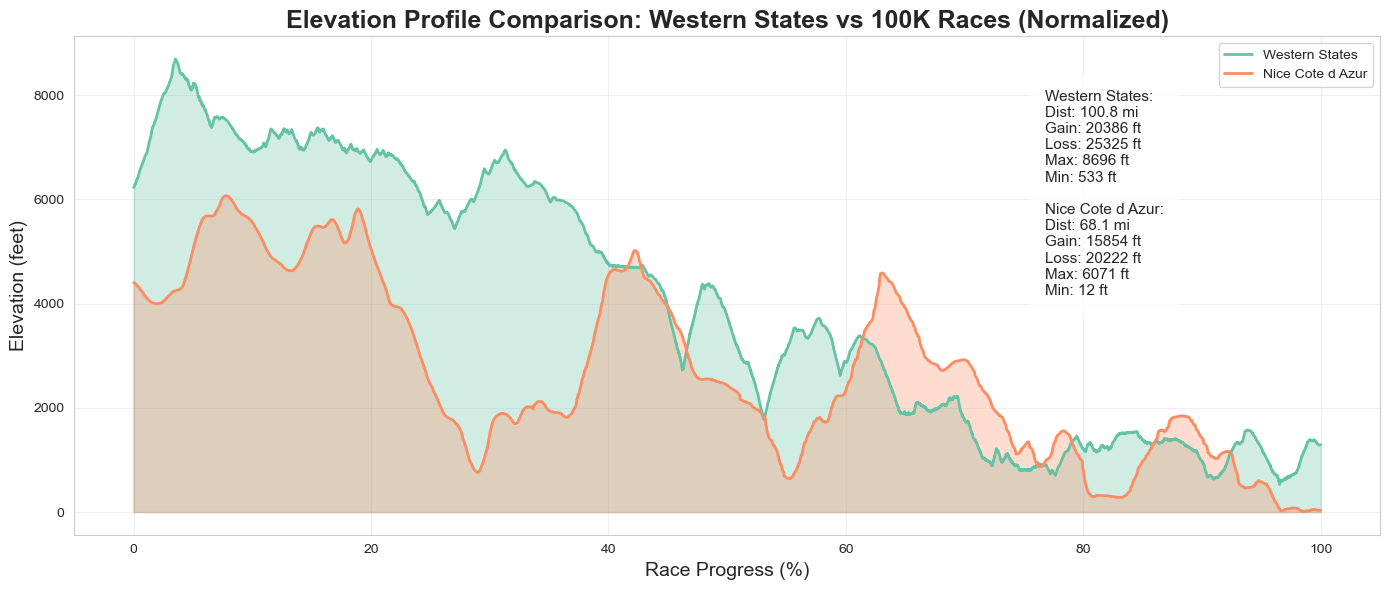

In [42]:
routes = {
    "Western States": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx',
    "Nice Cote d Azur": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\nice_cote_d_azur.gpx'
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes))

metrics_summary = []

plt.figure(figsize=(14, 6))

for (name, path), color in zip(routes.items(), colors):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    # Convert to feet and miles
    total_distance_mi = total_distance_m * meters_to_miles
    elevations_ft = [e * meters_to_feet for e in elevations_m]

    # Normalize distances to percentage of race completed
    distances_pct = [(d * meters_to_miles) / total_distance_mi * 100 for d in distances_m]

    # Metrics
    elevation_gain_ft = elevation_gain_m * meters_to_feet
    elevation_loss_ft = elevation_loss_m * meters_to_feet
    max_elev_ft = max(elevations_ft)
    min_elev_ft = min(elevations_ft)

    metrics_summary.append(
        f"{name}:\nDist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_ft:.0f} ft\nLoss: {elevation_loss_ft:.0f} ft\nMax: {max_elev_ft:.0f} ft\nMin: {min_elev_ft:.0f} ft"
    )

    # Plot normalized profile
    plt.plot(distances_pct, elevations_ft, label=name, linewidth=2, color=color)
    plt.fill_between(distances_pct, elevations_ft, color=color, alpha=0.3)

# Add metrics box
metrics_text = "\n\n".join(metrics_summary)
plt.figtext(0.75, 0.5, metrics_text, fontsize=11, bbox={"facecolor":"white","alpha":0.8,"pad":10})

# Titles and labels
plt.title("Elevation Profile Comparison: Western States vs 100K Races (Normalized)", fontsize=18, fontweight='bold')
plt.xlabel("Race Progress (%)", fontsize=14)
plt.ylabel("Elevation (feet)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

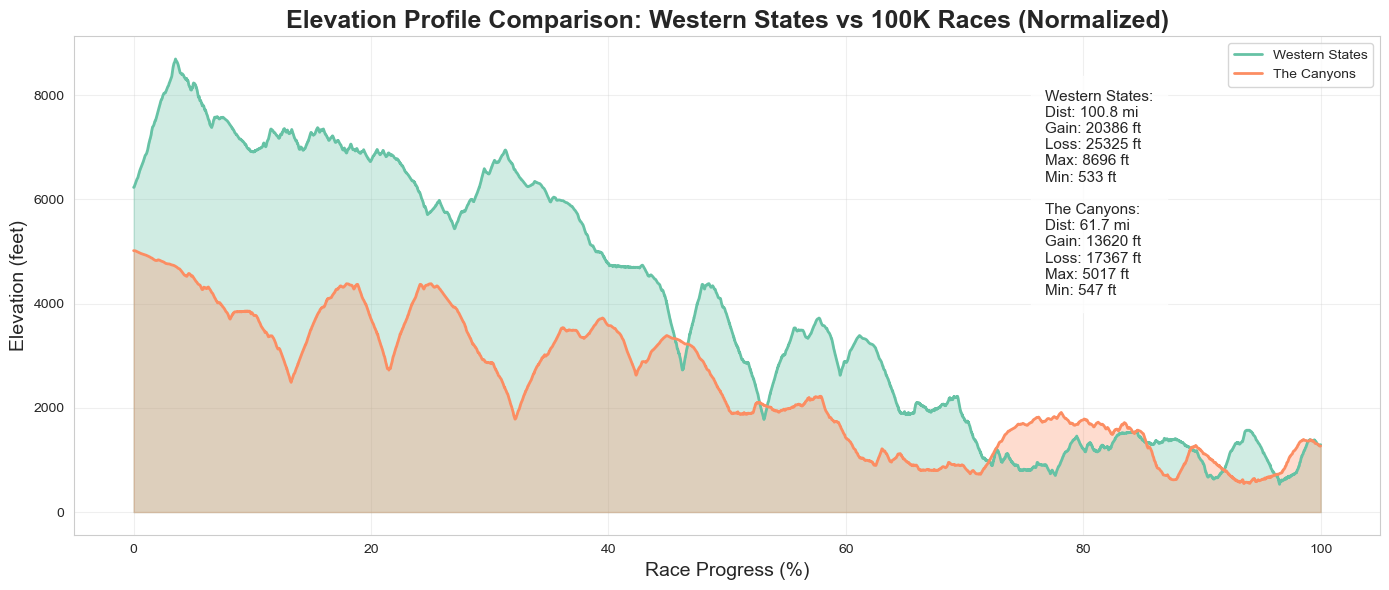

In [43]:
routes = {
    "Western States": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx',
    "The Canyons": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\the_canyons.gpx'
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes))

metrics_summary = []

plt.figure(figsize=(14, 6))

for (name, path), color in zip(routes.items(), colors):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    # Convert to feet and miles
    total_distance_mi = total_distance_m * meters_to_miles
    elevations_ft = [e * meters_to_feet for e in elevations_m]

    # Normalize distances to percentage of race completed
    distances_pct = [(d * meters_to_miles) / total_distance_mi * 100 for d in distances_m]

    # Metrics
    elevation_gain_ft = elevation_gain_m * meters_to_feet
    elevation_loss_ft = elevation_loss_m * meters_to_feet
    max_elev_ft = max(elevations_ft)
    min_elev_ft = min(elevations_ft)

    metrics_summary.append(
        f"{name}:\nDist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_ft:.0f} ft\nLoss: {elevation_loss_ft:.0f} ft\nMax: {max_elev_ft:.0f} ft\nMin: {min_elev_ft:.0f} ft"
    )

    # Plot normalized profile
    plt.plot(distances_pct, elevations_ft, label=name, linewidth=2, color=color)
    plt.fill_between(distances_pct, elevations_ft, color=color, alpha=0.3)

# Add metrics box
metrics_text = "\n\n".join(metrics_summary)
plt.figtext(0.75, 0.5, metrics_text, fontsize=11, bbox={"facecolor":"white","alpha":0.8,"pad":10})

# Titles and labels
plt.title("Elevation Profile Comparison: Western States vs 100K Races (Normalized)", fontsize=18, fontweight='bold')
plt.xlabel("Race Progress (%)", fontsize=14)
plt.ylabel("Elevation (feet)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

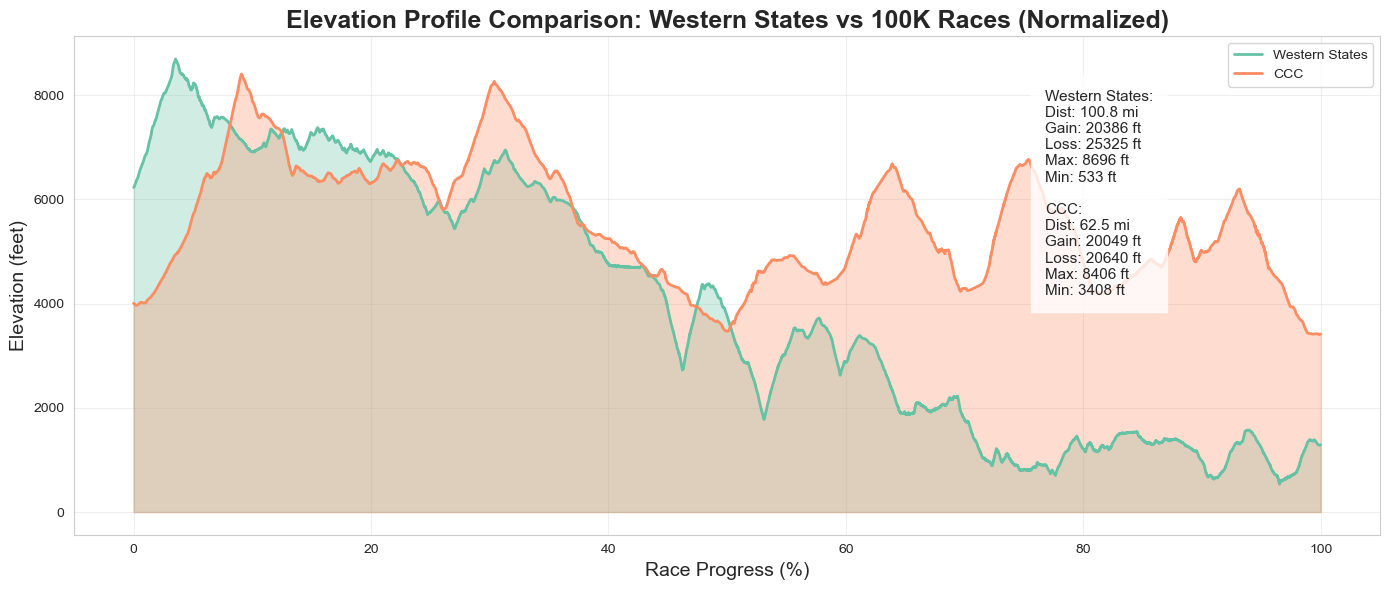

In [115]:
routes = {
    "Western States": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx',
    "CCC": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_ccc.gpx'
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes))

metrics_summary = []

plt.figure(figsize=(14, 6))

for (name, path), color in zip(routes.items(), colors):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    # Convert to feet and miles
    total_distance_mi = total_distance_m * meters_to_miles
    elevations_ft = [e * meters_to_feet for e in elevations_m]

    # Normalize distances to percentage of race completed
    distances_pct = [(d * meters_to_miles) / total_distance_mi * 100 for d in distances_m]

    # Metrics
    elevation_gain_ft = elevation_gain_m * meters_to_feet
    elevation_loss_ft = elevation_loss_m * meters_to_feet
    max_elev_ft = max(elevations_ft)
    min_elev_ft = min(elevations_ft)

    metrics_summary.append(
        f"{name}:\nDist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_ft:.0f} ft\nLoss: {elevation_loss_ft:.0f} ft\nMax: {max_elev_ft:.0f} ft\nMin: {min_elev_ft:.0f} ft"
    )

    # Plot normalized profile
    plt.plot(distances_pct, elevations_ft, label=name, linewidth=2, color=color)
    plt.fill_between(distances_pct, elevations_ft, color=color, alpha=0.3)

# Add metrics box
metrics_text = "\n\n".join(metrics_summary)
plt.figtext(0.75, 0.5, metrics_text, fontsize=11, bbox={"facecolor":"white","alpha":0.8,"pad":10})

# Titles and labels
plt.title("Elevation Profile Comparison: Western States vs 100K Races (Normalized)", fontsize=18, fontweight='bold')
plt.xlabel("Race Progress (%)", fontsize=14)
plt.ylabel("Elevation (feet)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

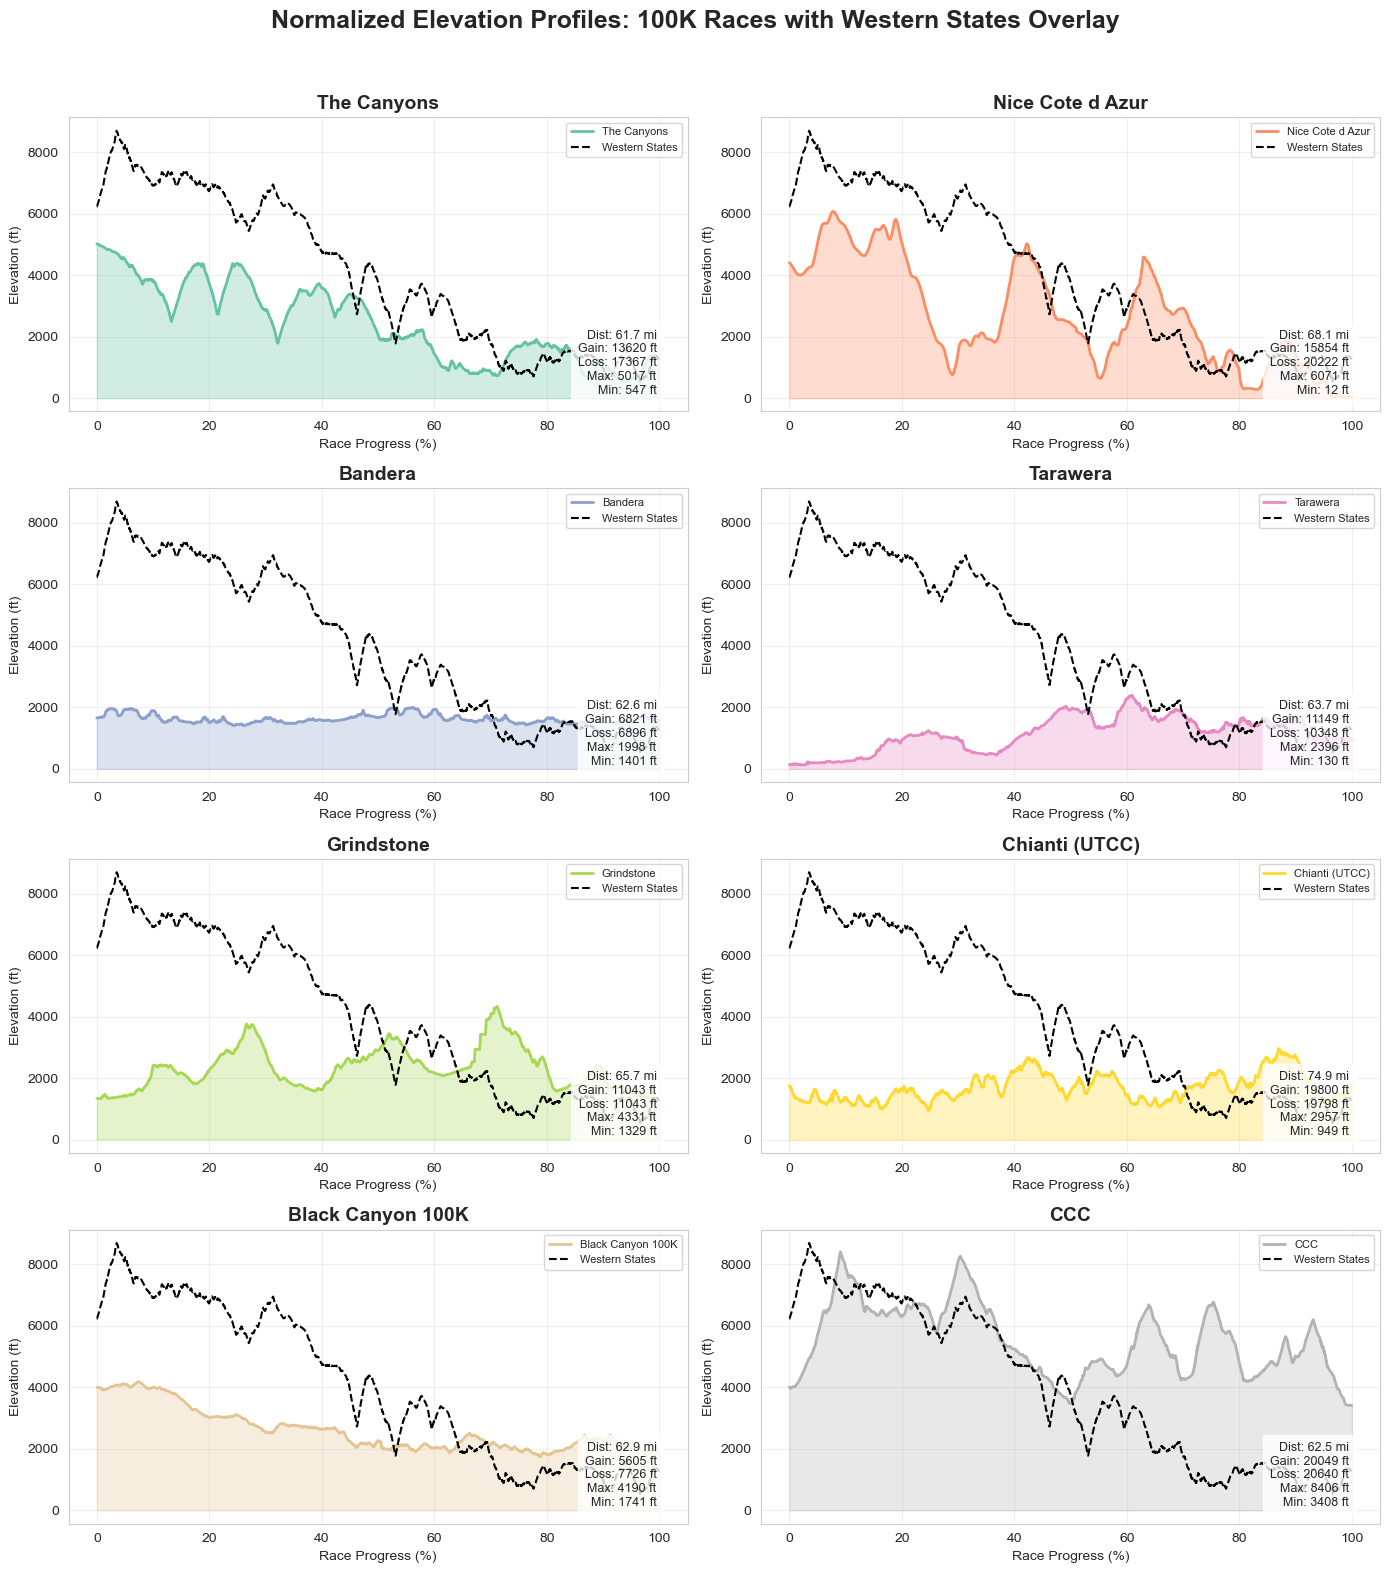

In [57]:
import math
# Replace these paths with your actual GPX files
western_states_path = r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx'
routes_100k = {
    "The Canyons": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\the_canyons.gpx',
    "Nice Cote d Azur": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\nice_cote_d_azur.gpx',
    "Bandera": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\bandera.gpx',
    "Tarawera": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_tarawera.gpx',
    "Grindstone": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_grindstone.gpx',
    "Chianti (UTCC)": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_chianti.gpx',
    "Black Canyon 100K": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2024_black_canyon.gpx',
    "CCC": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_ccc.gpx'
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes_100k))

# Function to parse GPX and return normalized data
def parse_gpx(path):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    total_distance_mi = total_distance_m * meters_to_miles
    elevations_ft = [e * meters_to_feet for e in elevations_m]
    distances_pct = [(d * meters_to_miles) / total_distance_mi * 100 for d in distances_m]

    metrics = f"Dist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_m * meters_to_feet:.0f} ft\nLoss: {elevation_loss_m * meters_to_feet:.0f} ft\nMax: {max(elevations_ft):.0f} ft\nMin: {min(elevations_ft):.0f} ft"

    return distances_pct, elevations_ft, metrics

# Parse Western States
ws_distances_pct, ws_elevations_ft, ws_metrics = parse_gpx(western_states_path)

# Parse 100K races
race_data = []
for name, path in routes_100k.items():
    dist_pct, elev_ft, metrics = parse_gpx(path)
    race_data.append({"name": name, "distances_pct": dist_pct, "elevations_ft": elev_ft, "metrics": metrics})

# Plot grid
num_races = len(race_data)
cols = 2
rows = math.ceil(num_races / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 4))
axes = axes.flatten()

for i, race in enumerate(race_data):
    ax = axes[i]
    # Plot 100K race
    ax.plot(race["distances_pct"], race["elevations_ft"], linewidth=2, color=colors[i], label=race["name"])
    ax.fill_between(race["distances_pct"], race["elevations_ft"], color=colors[i], alpha=0.3)
    # Overlay Western States
    ax.plot(ws_distances_pct, ws_elevations_ft, linewidth=1.5, color="black", linestyle="--", label="Western States")
    ax.set_title(race["name"], fontsize=14, fontweight='bold')
    ax.set_xlabel("Race Progress (%)")
    ax.set_ylabel("Elevation (ft)")
    ax.grid(alpha=0.3)
    ax.legend(fontsize=8)
    # Add metrics box
    ax.text(0.95, 0.05, race["metrics"], transform=ax.transAxes,
            fontsize=9, ha='right', va='bottom',
            bbox={"facecolor":"white","alpha":0.8,"pad":5})

# Hide unused subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Normalized Elevation Profiles: 100K Races with Western States Overlay", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])


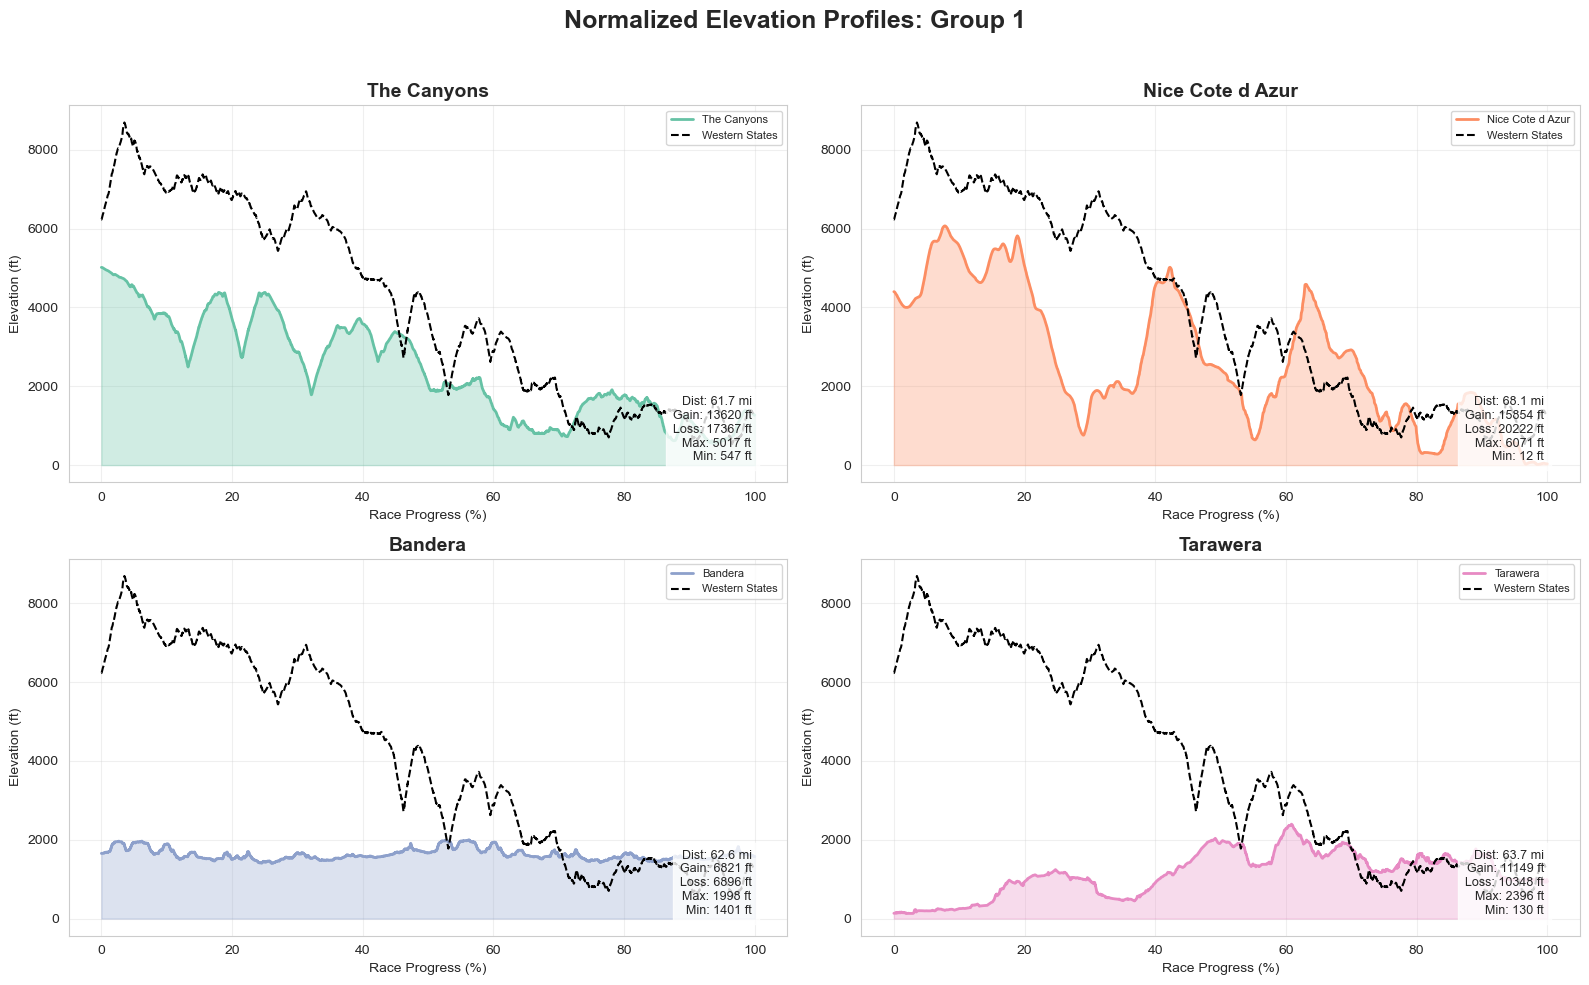

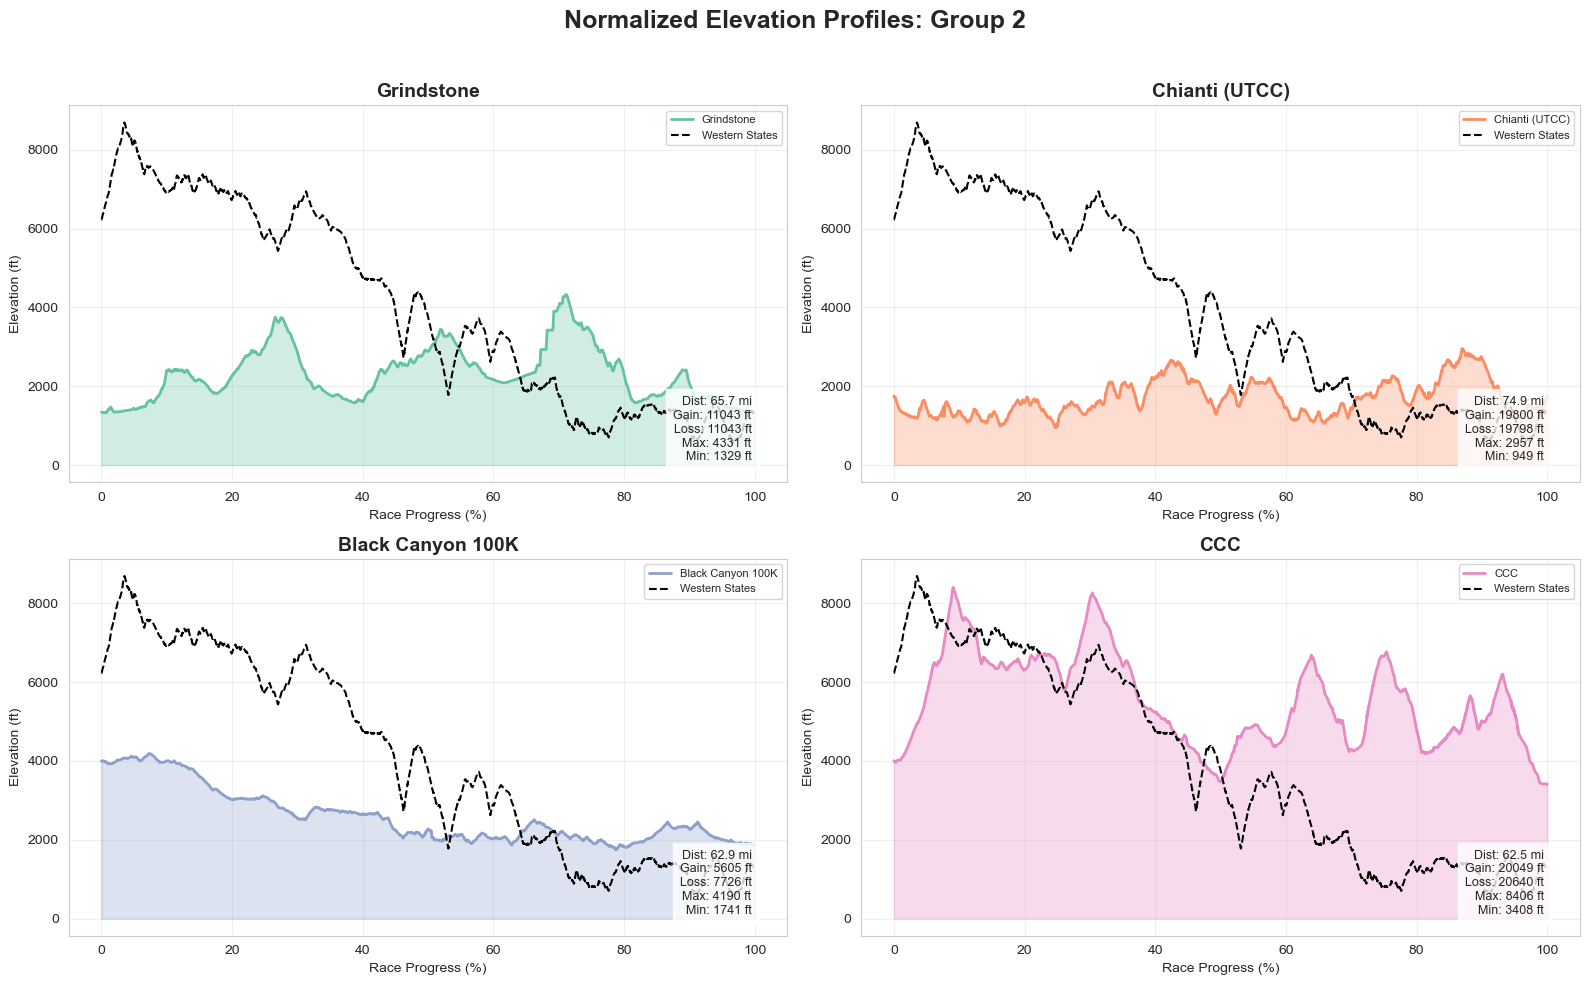

In [58]:

# Your existing paths
western_states_path = r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx'
routes_100k = {
    "The Canyons": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\the_canyons.gpx',
    "Nice Cote d Azur": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\nice_cote_d_azur.gpx',
    "Bandera": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\bandera.gpx',
    "Tarawera": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_tarawera.gpx',
    "Grindstone": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_grindstone.gpx',
    "Chianti (UTCC)": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_chianti.gpx',
    "Black Canyon 100K": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2024_black_canyon.gpx',
    "CCC": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_ccc.gpx'
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes_100k))

# Function to parse GPX
def parse_gpx(path):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    total_distance_mi = total_distance_m * meters_to_miles
    elevations_ft = [e * meters_to_feet for e in elevations_m]
    distances_pct = [(d * meters_to_miles) / total_distance_mi * 100 for d in distances_m]

    metrics = f"Dist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_m * meters_to_feet:.0f} ft\nLoss: {elevation_loss_m * meters_to_feet:.0f} ft\nMax: {max(elevations_ft):.0f} ft\nMin: {min(elevations_ft):.0f} ft"

    return distances_pct, elevations_ft, metrics

# Parse Western States
ws_distances_pct, ws_elevations_ft, ws_metrics = parse_gpx(western_states_path)

# Parse 100K races
race_data = []
for name, path in routes_100k.items():
    dist_pct, elev_ft, metrics = parse_gpx(path)
    race_data.append({"name": name, "distances_pct": dist_pct, "elevations_ft": elev_ft, "metrics": metrics})

# Split into two groups of 4
groups = [race_data[:4], race_data[4:]]

for idx, group in enumerate(groups, start=1):
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    axes = axes.flatten()

    for i, race in enumerate(group):
        ax = axes[i]
        ax.plot(race["distances_pct"], race["elevations_ft"], linewidth=2, color=colors[i], label=race["name"])
        ax.fill_between(race["distances_pct"], race["elevations_ft"], color=colors[i], alpha=0.3)
        ax.plot(ws_distances_pct, ws_elevations_ft, linewidth=1.5, color="black", linestyle="--", label="Western States")
        ax.set_title(race["name"], fontsize=14, fontweight='bold')
        ax.set_xlabel("Race Progress (%)")
        ax.set_ylabel("Elevation (ft)")
        ax.grid(alpha=0.3)
        ax.legend(fontsize=8)
        ax.text(0.95, 0.05, race["metrics"], transform=ax.transAxes,
                fontsize=9, ha='right', va='bottom',
                bbox={"facecolor":"white","alpha":0.8,"pad":5})

    # Hide unused axes if any
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f"Normalized Elevation Profiles: Group {idx}", fontsize=18, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    # plt.savefig(f"elevation_profiles_group_{idx}.png")
    plt.show()

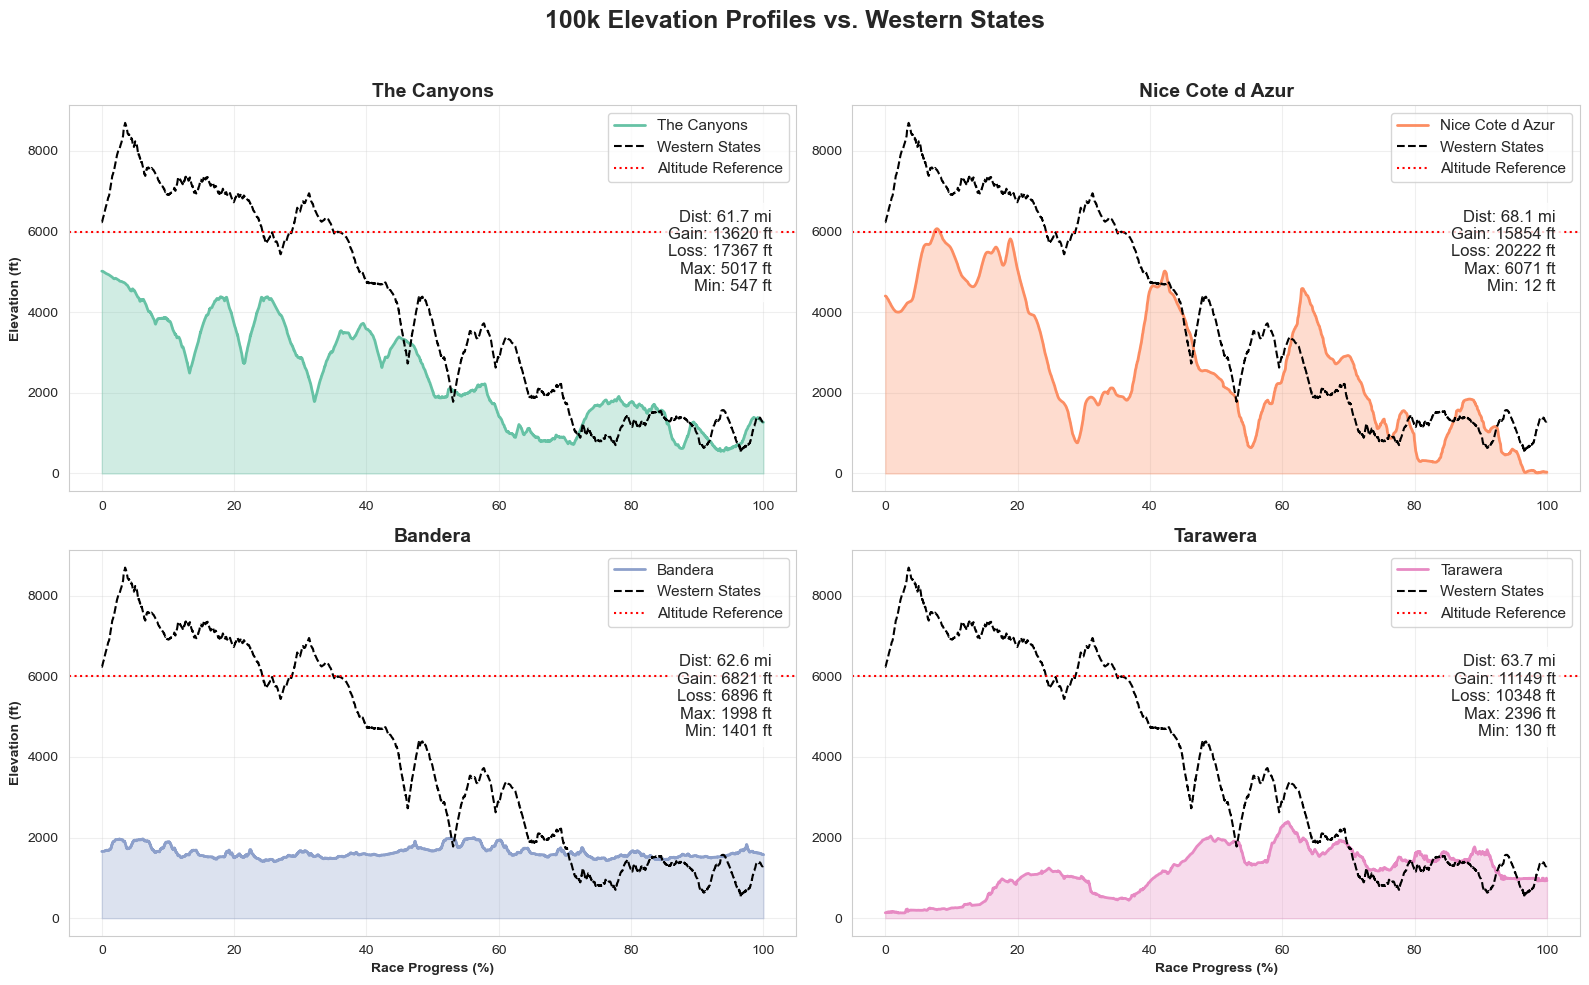

In [93]:
# Your existing paths
western_states_path = r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx'
routes_100k = {
    "The Canyons": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\the_canyons.gpx',
    "Nice Cote d Azur": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\nice_cote_d_azur.gpx',
    "Bandera": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\bandera.gpx',
    "Tarawera": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_tarawera.gpx',
    "Grindstone": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_grindstone.gpx',
    "Chianti (UTCC)": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_chianti.gpx',
    "Black Canyon 100K": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2024_black_canyon.gpx',
    "CCC": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_ccc.gpx'
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes_100k))

# Function to parse GPX
def parse_gpx(path):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    total_distance_mi = total_distance_m * meters_to_miles
    elevations_ft = [e * meters_to_feet for e in elevations_m]
    distances_pct = [(d * meters_to_miles) / total_distance_mi * 100 for d in distances_m]

    metrics = f"Dist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_m * meters_to_feet:.0f} ft\nLoss: {elevation_loss_m * meters_to_feet:.0f} ft\nMax: {max(elevations_ft):.0f} ft\nMin: {min(elevations_ft):.0f} ft"

    return distances_pct, elevations_ft, metrics

# Parse Western States
ws_distances_pct, ws_elevations_ft, ws_metrics = parse_gpx(western_states_path)

# Parse 100K races
race_data = []
for name, path in routes_100k.items():
    dist_pct, elev_ft, metrics = parse_gpx(path)
    race_data.append({"name": name, "distances_pct": dist_pct, "elevations_ft": elev_ft, "metrics": metrics})
ups = [race_data[:4], race_data[4:]]



#Select only the first 4 races
group = race_data[:4]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, race in enumerate(group):
    ax = axes[i]
    # Plot 100K race
    ax.plot(race["distances_pct"], race["elevations_ft"], linewidth=2, color=colors[i], label=race["name"])
    ax.fill_between(race["distances_pct"], race["elevations_ft"], color=colors[i], alpha=0.3)
    # Overlay Western States
    ax.plot(ws_distances_pct, ws_elevations_ft, linewidth=1.5, color="black", linestyle="--", label="Western States")
    # Add red dotted line at 6000 ft and include in legend
    ax.axhline(y=6000, color='red', linestyle=':', linewidth=1.5, label="Altitude Reference")
    
    ax.set_title(race["name"], fontsize=14, fontweight='bold')

    # Only show x-label on bottom row
    if i >= 2:  # bottom row
        ax.set_xlabel("Race Progress (%)", fontsize=10, fontweight='bold')
    else:
        ax.set_xlabel("")

    # Only show y-label on left column
    if i % 2 == 0:  # left column
        ax.set_ylabel("Elevation (ft)", fontsize=10, fontweight='bold')
    else:
        ax.set_ylabel("")

    ax.grid(alpha=0.3)
    
    # After plotting and adding legend
    legend = ax.legend(fontsize=11, loc='upper right')  # capture legend object
    
    # Get legend position in axes coordinates
    legend_box = legend.get_window_extent(ax.figure.canvas.get_renderer())
    legend_box = legend_box.transformed(ax.transAxes.inverted())
    
    # Calculate position just below the legend
    x_pos = legend_box.x1 - 0.02  # slightly to the left of legend's right edge
    y_pos = legend_box.y0 - 0.05  # slightly below legend's bottom edge
    
    # Add metrics box below legend
    ax.text(x_pos, y_pos, race["metrics"], transform=ax.transAxes,
            fontsize=12, ha='right', va='top',
            bbox={"facecolor": "white", "alpha": 0.8, "pad": 5})
    
# Hide unused axes if any
for j in range(len(group), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("100k Elevation Profiles vs. Western States", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.savefig("elevation_profiles_group_2.png", dpi = 300)
plt.show()




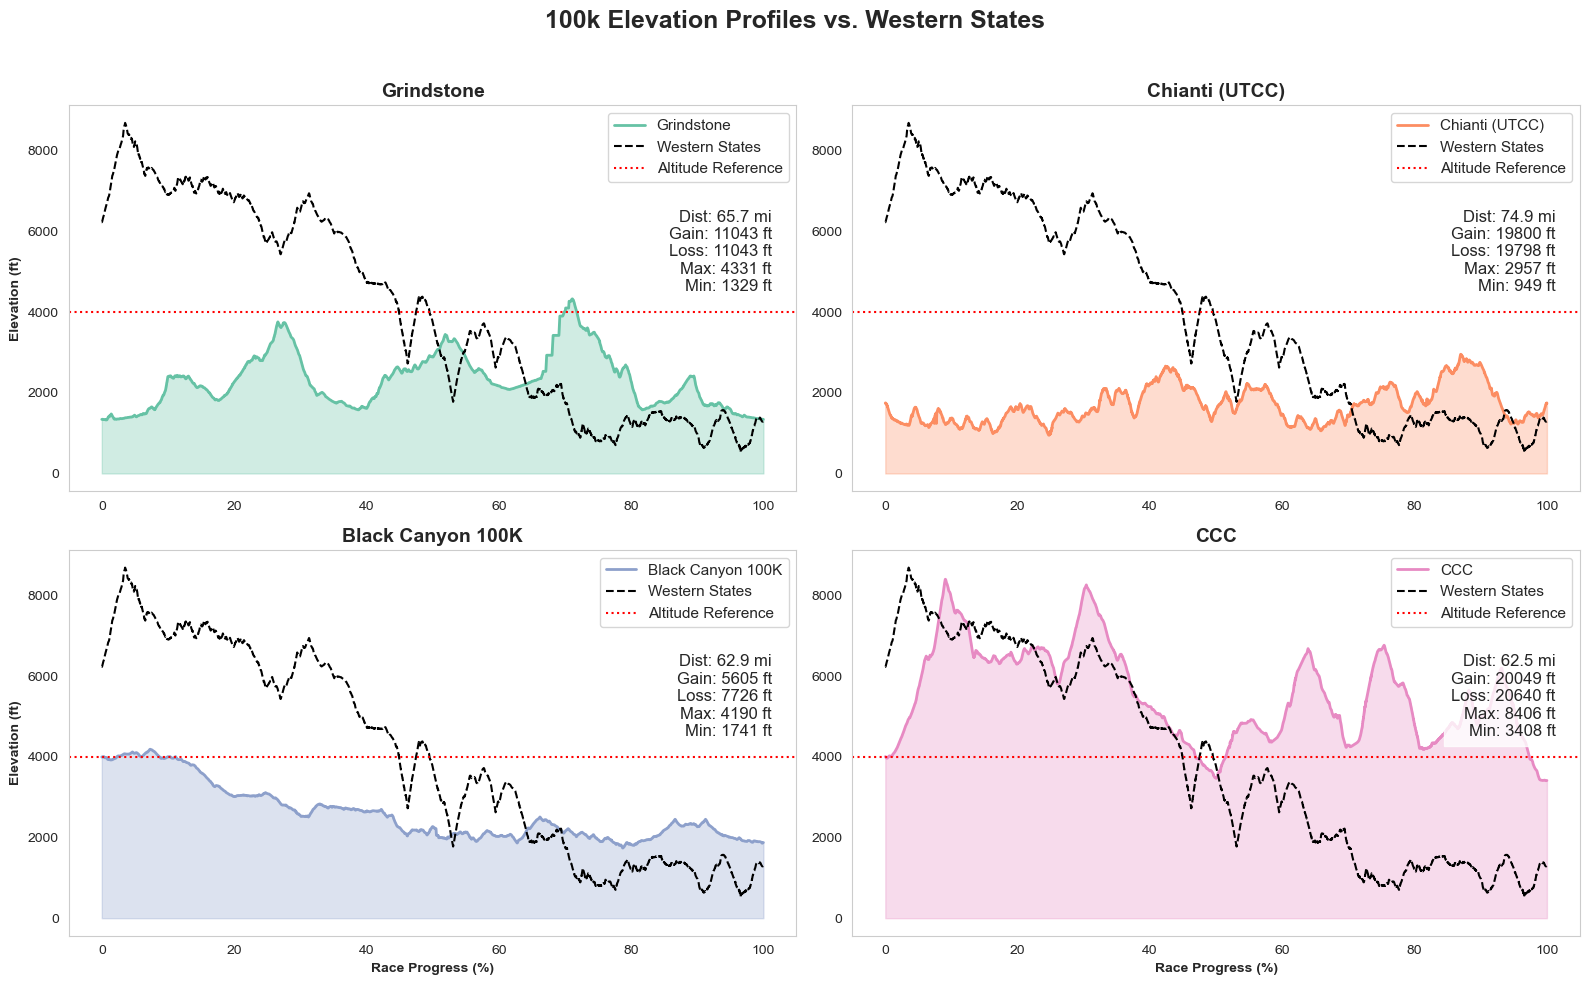

In [114]:
#Select only the first 4 races
group = race_data[4:]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, race in enumerate(group):
    ax = axes[i]
    # Plot 100K race
    ax.plot(race["distances_pct"], race["elevations_ft"], linewidth=2, color=colors[i], label=race["name"])
    ax.fill_between(race["distances_pct"], race["elevations_ft"], color=colors[i], alpha=0.3)
    # Overlay Western States
    ax.plot(ws_distances_pct, ws_elevations_ft, linewidth=1.5, color="black", linestyle="--", label="Western States")
    
    # Add red dotted line at 6000 ft and include in legend
    ax.axhline(y=6000, color='red', linestyle=':', linewidth=1.5, label="Altitude Reference")

    ax.set_title(race["name"], fontsize=14, fontweight='bold')


    # Only show x-label on bottom row
    if i >= 2:  # bottom row
        ax.set_xlabel("Race Progress (%)", fontsize=10, fontweight='bold')
    else:
        ax.set_xlabel("")

    # Only show y-label on left column
    if i % 2 == 0:  # left column
        ax.set_ylabel("Elevation (ft)", fontsize=10, fontweight='bold')
    else:
        ax.set_ylabel("")

    ax.grid(False)
   
    # After plotting and adding legend
    legend = ax.legend(fontsize=11, loc='upper right')  # capture legend object
    
    # Get legend position in axes coordinates
    legend_box = legend.get_window_extent(ax.figure.canvas.get_renderer())
    legend_box = legend_box.transformed(ax.transAxes.inverted())
    
    # Calculate position just below the legend
    x_pos = legend_box.x1 - 0.02  # slightly to the left of legend's right edge
    y_pos = legend_box.y0 - 0.05  # slightly below legend's bottom edge
    
    # Add metrics box below legend
    ax.text(x_pos, y_pos, race["metrics"], transform=ax.transAxes,
            fontsize=12, ha='right', va='top',
            bbox={"facecolor": "white", "alpha": 0.8, "pad": 5})

# Hide unused axes if any
for j in range(len(group), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("100k Elevation Profiles vs. Western States", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("elevation_profiles_group_1.png", dpi = 300)
plt.show()

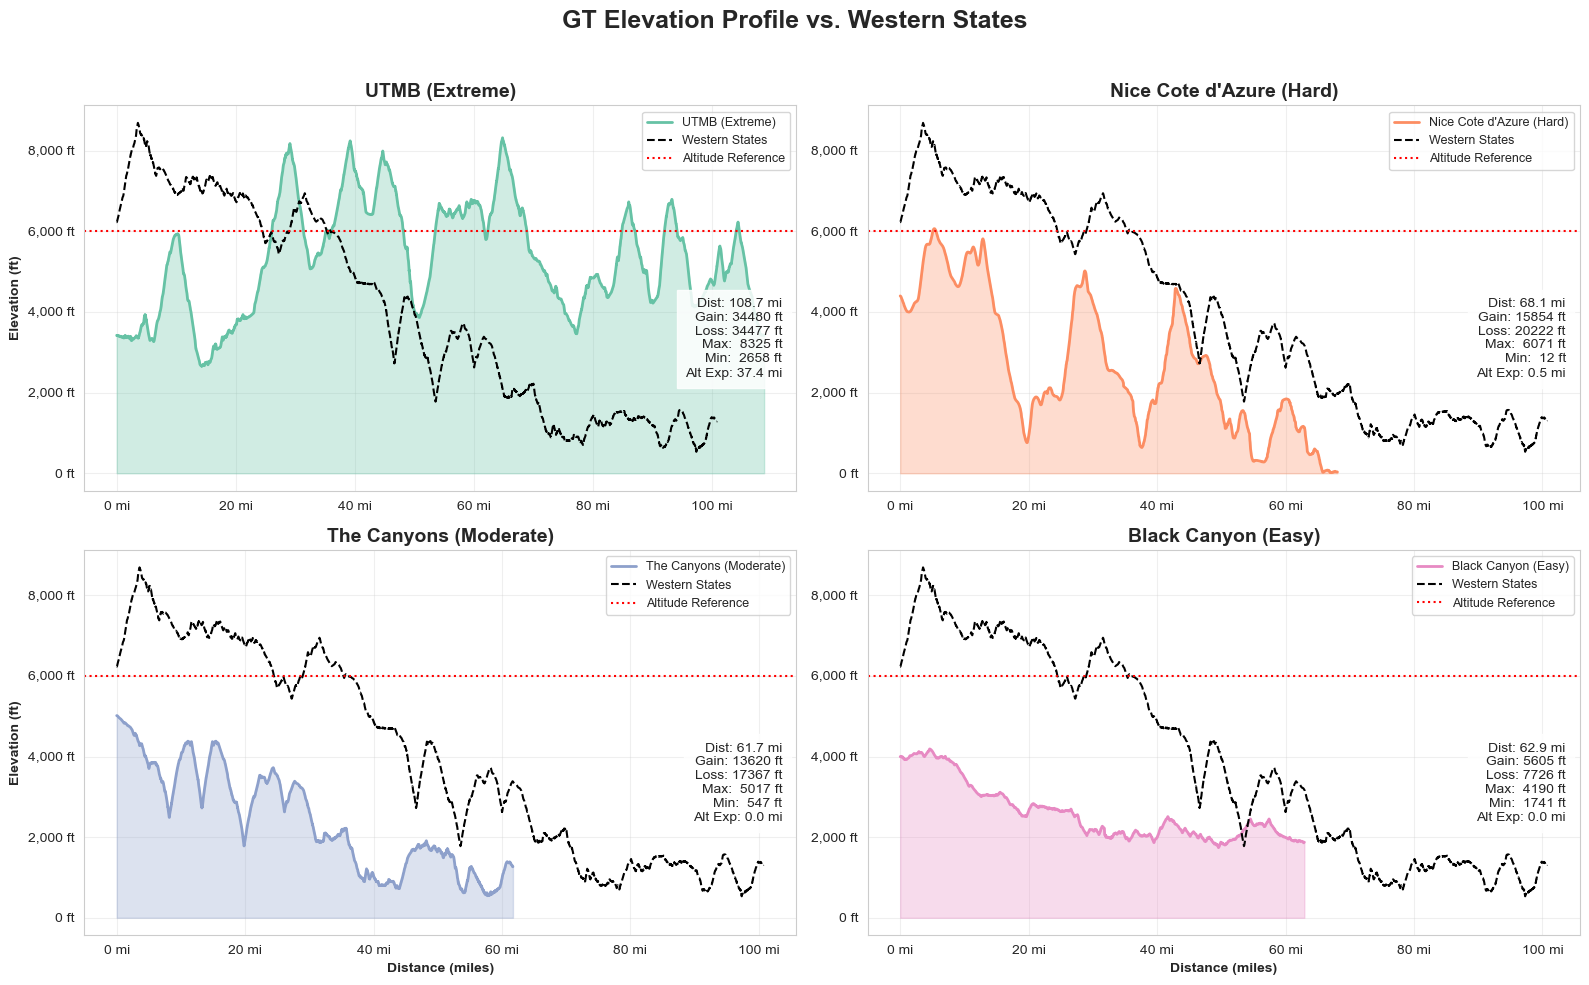

In [99]:
# ---- Style ----
sns.set_style("whitegrid")

# Your existing paths
western_states_path = r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx'
routes_100k = {
   "UTMB (Extreme)": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_utmb.gpx',
   "Nice Cote d'Azure (Hard)": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\nice_cote_d_azur.gpx',
   "The Canyons (Moderate)": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\the_canyons.gpx',
   "Black Canyon (Easy)": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2024_black_canyon.gpx'
}

# Unit conversions
meters_to_miles = 0.000621371
meters_to_feet = 3.28084

# Color palette for 100M routes
colors = sns.color_palette("Set2", len(routes_100k))

# ---- Parse GPX to miles (NOT normalized to %) ----
def parse_gpx(path):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0.0
    elevation_gain_m = 0.0
    elevation_loss_m = 0.0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)  # meters
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    # elevation delta
                    delta_elev = (point.elevation or 0) - (prev_point.elevation or 0)
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0.0)
                elevations_m.append(point.elevation or 0.0)
                prev_point = point

    # Convert for plotting/metrics
    distances_mi = [d * meters_to_miles for d in distances_m]
    elevations_ft = [e * meters_to_feet for e in elevations_m]
    total_distance_mi = total_distance_m * meters_to_miles
    gain_ft = elevation_gain_m * meters_to_feet
    loss_ft = elevation_loss_m * meters_to_feet
    max_ft = max(elevations_ft) if elevations_ft else 0.0
    min_ft = min(elevations_ft) if elevations_ft else 0.0

    
     # Calculate exposure > 6000 ft
    exposure_miles = 0.0
    for i in range(1, len(distances_mi)):
        if elevations_ft[i] > 6000 and elevations_ft[i-1] > 6000:
            exposure_miles += distances_mi[i] - distances_mi[i-1]


    metrics = (
        f"Dist: {total_distance_mi:.1f} mi\n"
        f"Gain: {gain_ft:.0f} ft\n"
        f"Loss: {loss_ft:.0f} ft\n"
        f"Max:  {max_ft:.0f} ft\n"
        f"Min:  {min_ft:.0f} ft\n"
        f"Alt Exp: {exposure_miles:.1f} mi"
    )

    return distances_mi, elevations_ft, metrics

# ---- Parse Western States once (as miles) ----
ws_distances_mi, ws_elevations_ft, ws_metrics = parse_gpx(western_states_path)

# ---- Parse 100M races ----
race_data = []
for name, path in routes_100k.items():
    dist_mi, elev_ft, metrics = parse_gpx(path)
    race_data.append({
        "name": name,
        "distances_mi": dist_mi,
        "elevations_ft": elev_ft,
        "metrics": metrics
    })

# Select only the first 4 races (panel 2x2)
group = race_data[:4]

# ---- Plot ----
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, race in enumerate(group):
    ax = axes[i]
    # Plot 100M race (miles)
    ax.plot(race["distances_mi"], race["elevations_ft"], linewidth=2, color=colors[i], label=race["name"])
    ax.fill_between(race["distances_mi"], race["elevations_ft"], color=colors[i], alpha=0.3)

    # Overlay Western States (miles)
    ax.plot(ws_distances_mi, ws_elevations_ft, linewidth=1.5, color="black", linestyle="--", label="Western States")

    # Dotted reference at 6000 ft
    ax.axhline(y=6000, color='red', linestyle=':', linewidth=1.5, label="Altitude Reference")

    # Titles
    ax.set_title(race["name"], fontsize=14, fontweight='bold')

    # Axis labels (only on outer edges for cleanliness)
    if i >= 2:  # bottom row
        ax.set_xlabel("Distance (miles)", fontsize=10, fontweight='bold')
    if i % 2 == 0:  # left column
        ax.set_ylabel("Elevation (ft)", fontsize=10, fontweight='bold')

    # Tick formatting
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x)} mi"))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f"{int(y):,} ft"))

    # Grid
    ax.grid(alpha=0.3)

    # Legend (compact)
    ax.legend(fontsize=9, loc='upper right', frameon=True)

    # Metrics box: fixed placement in axes coords (top-right quadrant)
    ax.text(
        0.98, 0.50, race["metrics"],
        transform=ax.transAxes,
        fontsize=10,
        ha='right', va='top',
        bbox={"facecolor": "white", "alpha": 0.85, "pad": 6}
    )

# Hide unused axes if any
for j in range(len(group), len(axes)):
    fig.delaxes(axes[j])

# Super title and layout
fig.suptitle("GT Elevation Profile vs. Western States", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.savefig('../python_images/elevation_profile_for_pres.png', dpi = 300)

plt.show()

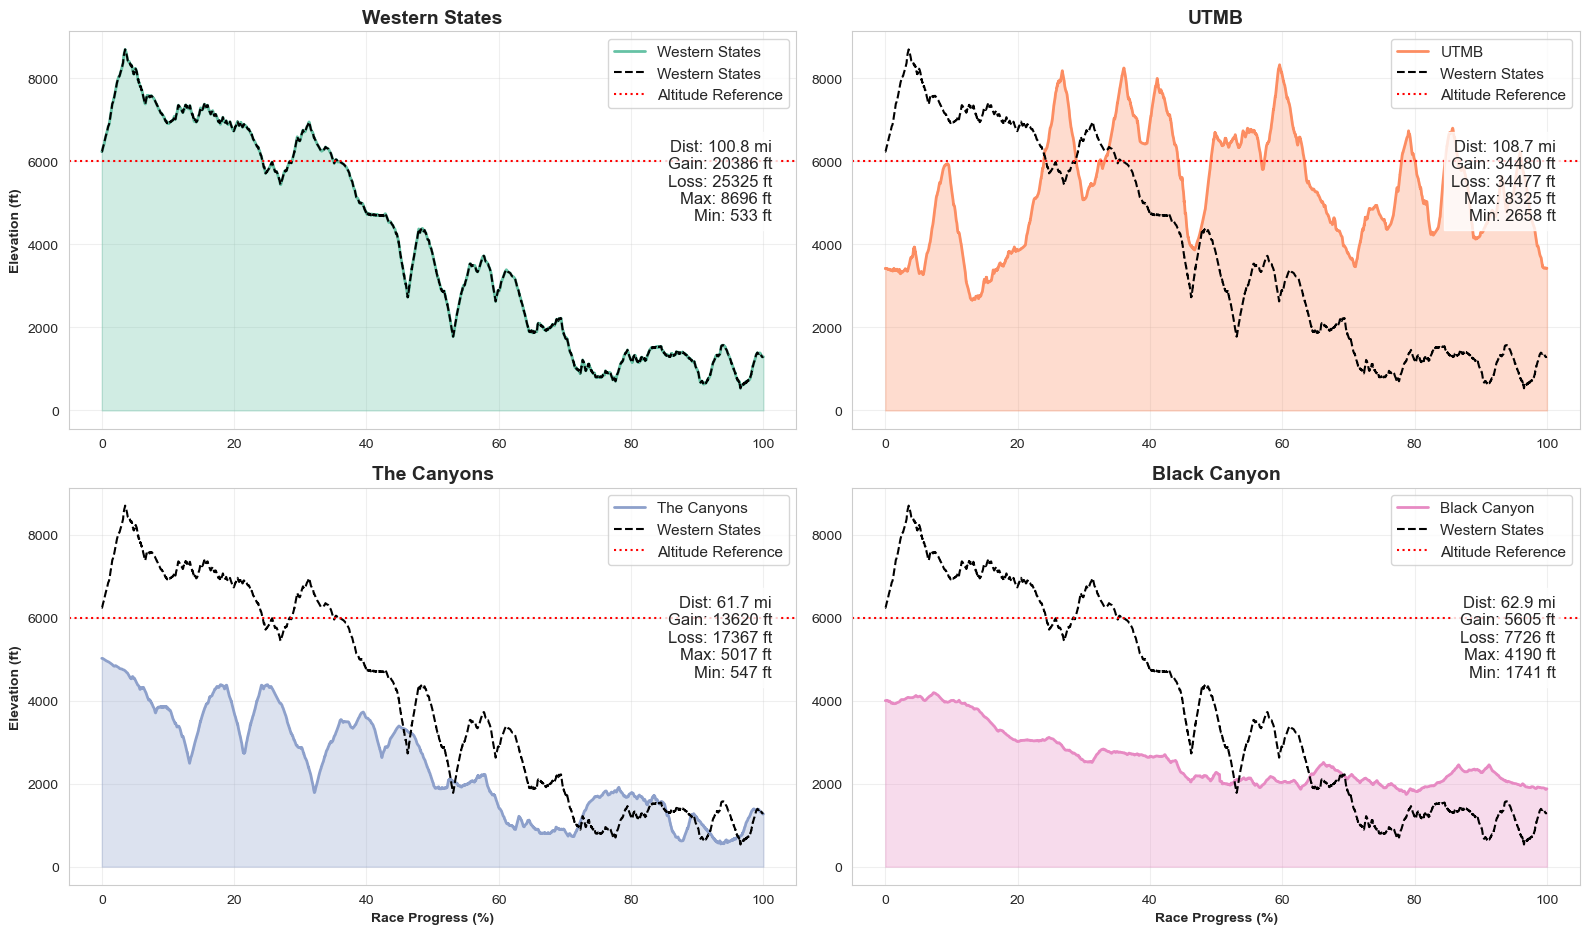

In [3]:
# ---- Style ----
sns.set_style("whitegrid")

# Your existing paths
western_states_path = r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx'
routes_100k = {
   "Western States": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx',
   "UTMB": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_utmb.gpx',
   "The Canyons": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\the_canyons.gpx',
   "Black Canyon": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2024_black_canyon.gpx'
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes_100k))

# Function to parse GPX
def parse_gpx(path):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    total_distance_mi = total_distance_m * meters_to_miles
    elevations_ft = [e * meters_to_feet for e in elevations_m]
    distances_pct = [(d * meters_to_miles) / total_distance_mi * 100 for d in distances_m]

    metrics = f"Dist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_m * meters_to_feet:.0f} ft\nLoss: {elevation_loss_m * meters_to_feet:.0f} ft\nMax: {max(elevations_ft):.0f} ft\nMin: {min(elevations_ft):.0f} ft"

    return distances_pct, elevations_ft, metrics

# Parse Western States
ws_distances_pct, ws_elevations_ft, ws_metrics = parse_gpx(western_states_path)

# Parse 100K races
race_data = []
for name, path in routes_100k.items():
    dist_pct, elev_ft, metrics = parse_gpx(path)
    race_data.append({"name": name, "distances_pct": dist_pct, "elevations_ft": elev_ft, "metrics": metrics})
ups = [race_data[:4], race_data[4:]]



#Select only the first 4 races
group = race_data[:4]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, race in enumerate(group):
    ax = axes[i]
    # Plot 100K race
    ax.plot(race["distances_pct"], race["elevations_ft"], linewidth=2, color=colors[i], label=race["name"])
    ax.fill_between(race["distances_pct"], race["elevations_ft"], color=colors[i], alpha=0.3)
    # Overlay Western States
    ax.plot(ws_distances_pct, ws_elevations_ft, linewidth=1.5, color="black", linestyle="--", label="Western States")
    # Add red dotted line at 6000 ft and include in legend
    ax.axhline(y=6000, color='red', linestyle=':', linewidth=1.5, label="Altitude Reference")
    
    ax.set_title(race["name"], fontsize=14, fontweight='bold')

    # Only show x-label on bottom row
    if i >= 2:  # bottom row
        ax.set_xlabel("Race Progress (%)", fontsize=10, fontweight='bold')
    else:
        ax.set_xlabel("")

    # Only show y-label on left column
    if i % 2 == 0:  # left column
        ax.set_ylabel("Elevation (ft)", fontsize=10, fontweight='bold')
    else:
        ax.set_ylabel("")

    ax.grid(alpha=0.3)
    
    # After plotting and adding legend
    legend = ax.legend(fontsize=11, loc='upper right')  # capture legend object
    
    # Get legend position in axes coordinates
    legend_box = legend.get_window_extent(ax.figure.canvas.get_renderer())
    legend_box = legend_box.transformed(ax.transAxes.inverted())
    
    # Calculate position just below the legend
    x_pos = legend_box.x1 - 0.02  # slightly to the left of legend's right edge
    y_pos = legend_box.y0 - 0.05  # slightly below legend's bottom edge
    
    # Add metrics box below legend
    ax.text(x_pos, y_pos, race["metrics"], transform=ax.transAxes,
            fontsize=12, ha='right', va='top',
            bbox={"facecolor": "white", "alpha": 0.8, "pad": 5})
    
# Hide unused axes if any
for j in range(len(group), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('../python_images/multi_elevation_profile.png', dpi = 300)
plt.show()